0


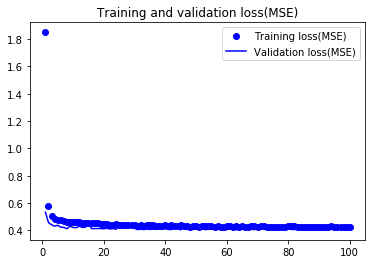

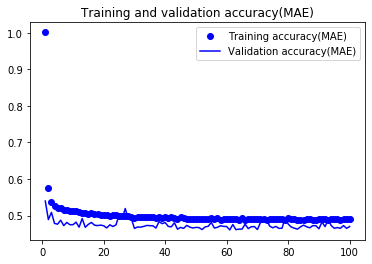

124/124 [==============================] - 0s 2ms/step - loss: 0.4233 - mean_absolute_error: 0.4782
Test MAE: 0.478
1


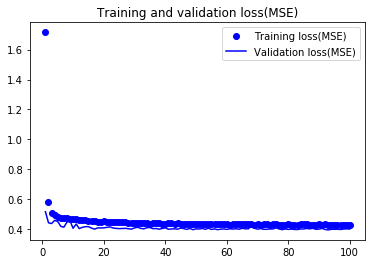

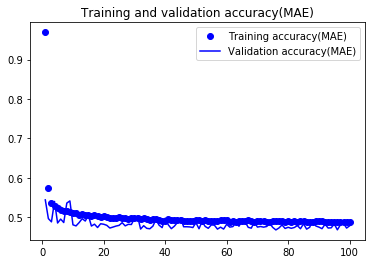

124/124 [==============================] - 0s 2ms/step - loss: 0.4048 - mean_absolute_error: 0.4756
Test MAE: 0.476
2


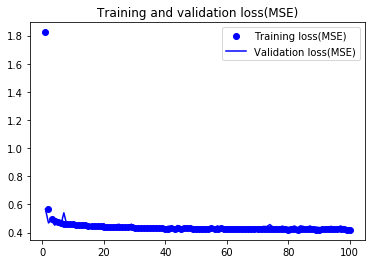

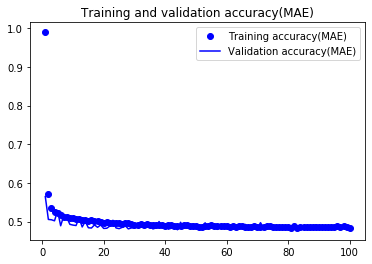

124/124 [==============================] - 0s 2ms/step - loss: 0.4076 - mean_absolute_error: 0.4818
Test MAE: 0.482
3


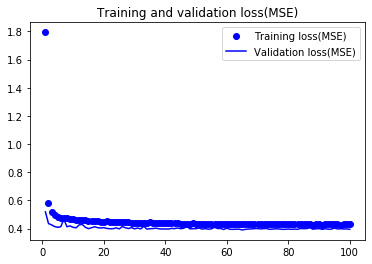

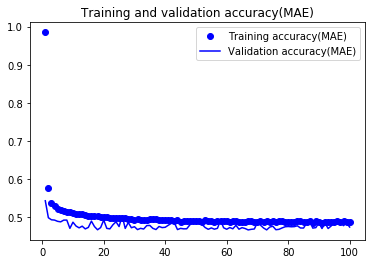

124/124 [==============================] - 0s 2ms/step - loss: 0.4099 - mean_absolute_error: 0.4795
Test MAE: 0.479
4


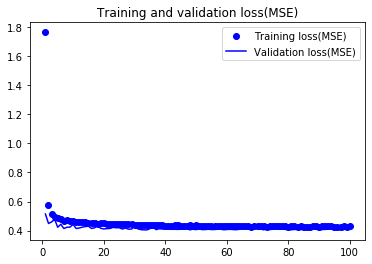

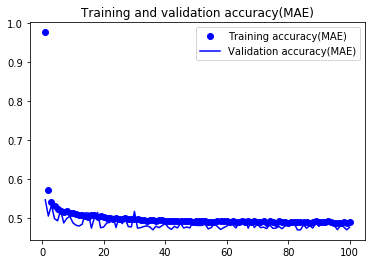

124/124 [==============================] - 0s 2ms/step - loss: 0.4081 - mean_absolute_error: 0.4727
Test MAE: 0.473
5


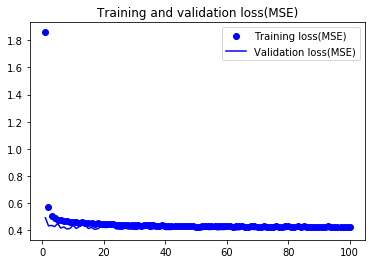

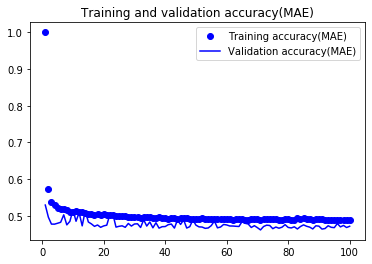

124/124 [==============================] - 0s 2ms/step - loss: 0.4179 - mean_absolute_error: 0.4711
Test MAE: 0.471
6


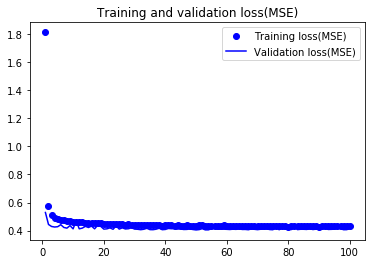

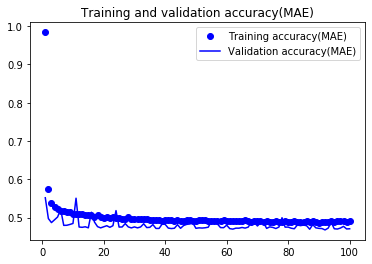

124/124 [==============================] - 0s 2ms/step - loss: 0.4043 - mean_absolute_error: 0.4690
Test MAE: 0.469
7


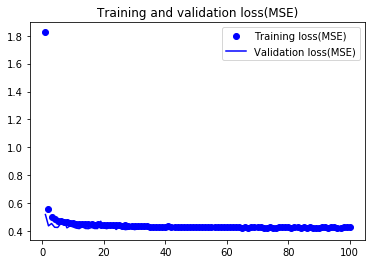

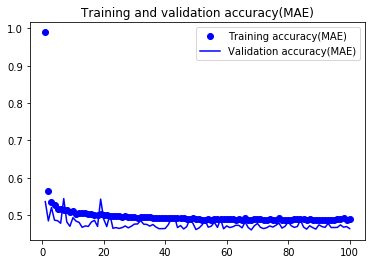

124/124 [==============================] - 0s 2ms/step - loss: 0.4266 - mean_absolute_error: 0.4773
Test MAE: 0.477
8


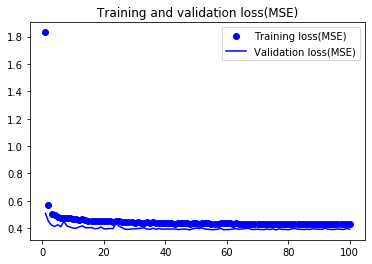

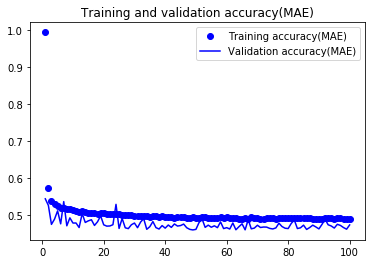

124/124 [==============================] - 0s 2ms/step - loss: 0.4123 - mean_absolute_error: 0.4792
Test MAE: 0.479
9


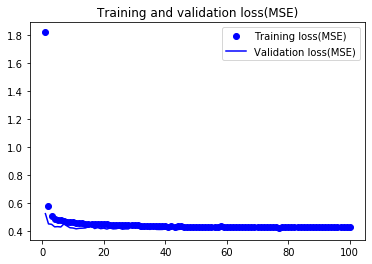

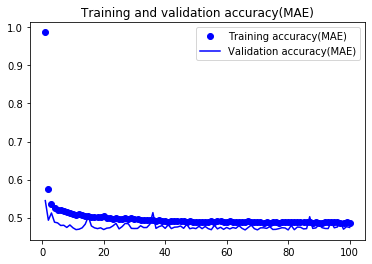

124/124 [==============================] - 0s 2ms/step - loss: 0.4246 - mean_absolute_error: 0.4899
Test MAE: 0.490
10


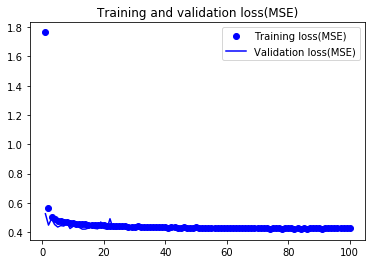

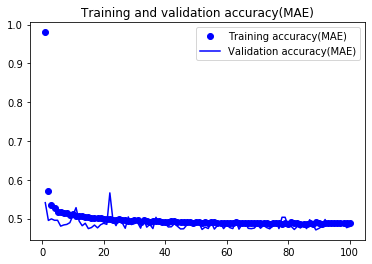

124/124 [==============================] - 0s 2ms/step - loss: 0.4049 - mean_absolute_error: 0.4724
Test MAE: 0.472
11


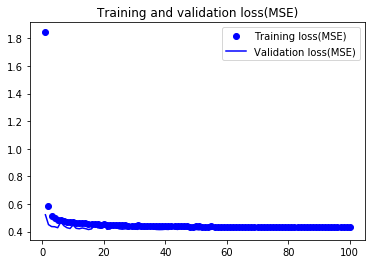

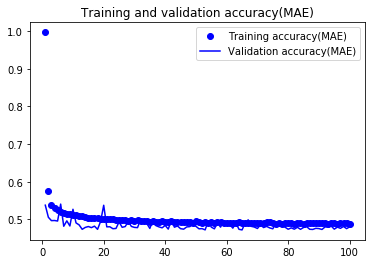

124/124 [==============================] - 0s 2ms/step - loss: 0.3904 - mean_absolute_error: 0.4693
Test MAE: 0.469
12


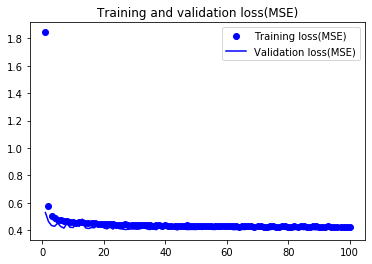

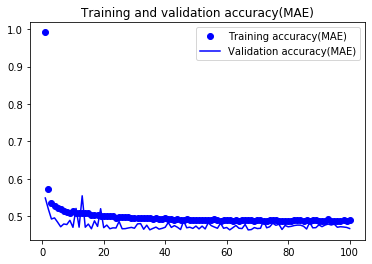

124/124 [==============================] - 0s 2ms/step - loss: 0.4156 - mean_absolute_error: 0.4713
Test MAE: 0.471
13


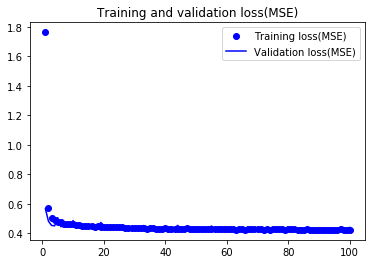

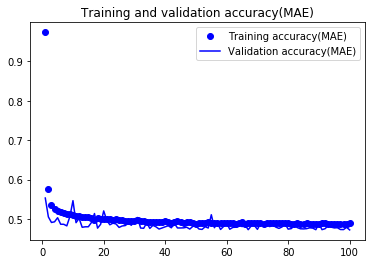

124/124 [==============================] - 0s 2ms/step - loss: 0.4114 - mean_absolute_error: 0.4628
Test MAE: 0.463
14


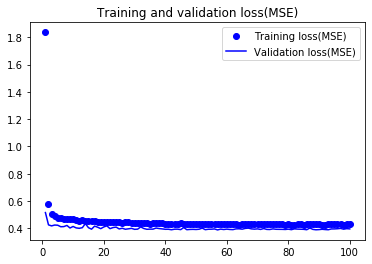

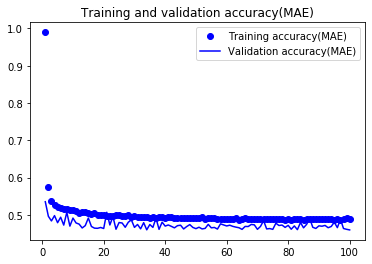

124/124 [==============================] - 0s 2ms/step - loss: 0.4374 - mean_absolute_error: 0.4711
Test MAE: 0.471
15


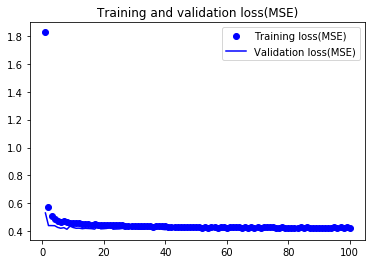

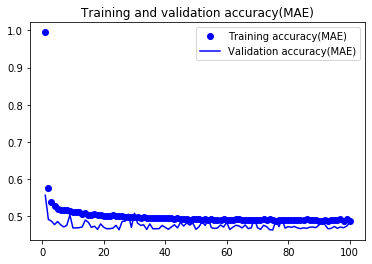

124/124 [==============================] - 0s 2ms/step - loss: 0.4175 - mean_absolute_error: 0.4839
Test MAE: 0.484
16


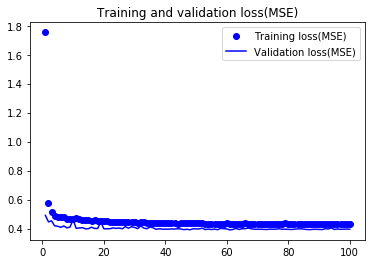

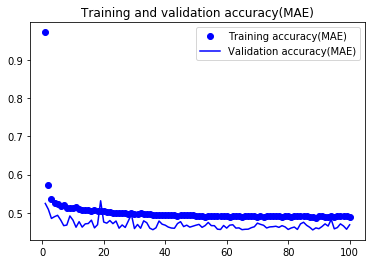

124/124 [==============================] - 0s 2ms/step - loss: 0.4087 - mean_absolute_error: 0.4811
Test MAE: 0.481
17


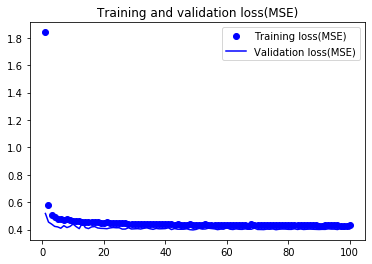

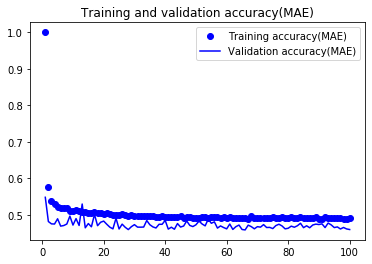

124/124 [==============================] - 0s 2ms/step - loss: 0.4071 - mean_absolute_error: 0.4634
Test MAE: 0.463
18


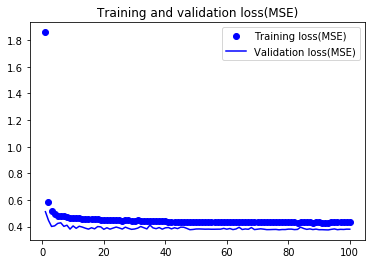

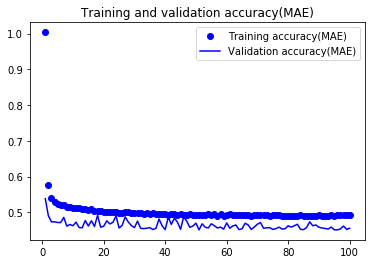

124/124 [==============================] - 0s 2ms/step - loss: 0.4208 - mean_absolute_error: 0.4775
Test MAE: 0.478
19


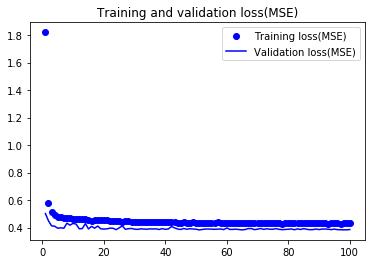

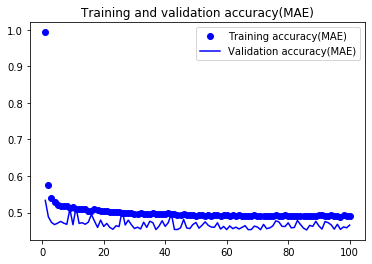

124/124 [==============================] - 0s 2ms/step - loss: 0.4232 - mean_absolute_error: 0.4808
Test MAE: 0.481
[0.4781510531902313, 0.4756133258342743, 0.4818015694618225, 0.47948676347732544, 0.47266677021980286, 0.4710808992385864, 0.46902909874916077, 0.47727319598197937, 0.4791882038116455, 0.489938884973526, 0.4724079370498657, 0.46932166814804077, 0.4712788462638855, 0.4628233313560486, 0.4710977375507355, 0.4838845729827881, 0.48105090856552124, 0.46335792541503906, 0.4775252044200897, 0.48078182339668274]


In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

mae_list1 = []
for i in range(20):
    print(i)
    airports = ['VABB', 'VOTV', 'VOBL', 'VECC', 'VIDP']

    def get_visibility(code):
        arr = np.load("visibility_arr.npy")
        idx = airports.index(code)
        return arr[:, idx].astype(np.float32)

    def get_era_full(param, level):
        arr = np.load("18To20{}{}_uint8.npy".format(param, level))
        return arr.astype(np.float32)

    # Import data
    params = ["z", "z", "z"]
    levels = [500, 700, 1000]

    in1_var = get_era_full(params[0], levels[0])
    in2_var = get_era_full(params[1], levels[1])
    in3_var = get_era_full(params[2], levels[2])

    # data for a given airport
    X = np.concatenate((np.expand_dims(in1_var, axis=3), np.expand_dims(in2_var, axis=3), np.expand_dims(in3_var, axis=3)), axis=3)
    Y = get_visibility('VABB').reshape(-1, 1)

    import sklearn
    from sklearn.model_selection import train_test_split

    # In the first step we will split the data in training and remaining dataset
    X_train, X_rem, Y_train, Y_rem = train_test_split(X,Y, train_size=0.7)

    # Now since we want the valid and test size to be equal. 
    X_valid, X_test, Y_valid, Y_test = train_test_split(X_rem,Y_rem, test_size=0.5)

    #to clear space for gpu, if occupied by any process
    import tensorflow as tf
    from tensorflow.compat.v1 import ConfigProto
    from tensorflow.compat.v1 import InteractiveSession
    config = ConfigProto()
    config.gpu_options.allow_growth=True
    sess = tf.compat.v1.Session(config=config)

    # model

    initializer = tf.keras.initializers.HeUniform()
    inputs = keras.Input(shape=(157, 157, 3))
    x = layers.Conv2D(filters=32, kernel_size=3, activation="relu", kernel_initializer = initializer)(inputs)
    x = layers.MaxPooling2D(pool_size=2)(x)
    x = layers.Conv2D(filters=64, kernel_size=3, activation="relu", kernel_initializer = initializer)(x)
    x = layers.MaxPooling2D(pool_size=2)(x)
    x = layers.Conv2D(filters=128, kernel_size=3, activation="relu", kernel_initializer = initializer)(x)
    x = layers.MaxPooling2D(pool_size=2)(x)
    x = layers.Conv2D(filters=256, kernel_size=3, activation="relu", kernel_initializer = initializer)(x)
    x = layers.MaxPooling2D(pool_size=2)(x)
    x = layers.Conv2D(filters=512, kernel_size=3, activation="relu", kernel_initializer = initializer)(x)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.BatchNormalization()(x)
    top_dropout_rate = 0.4
    x = layers.Dropout(top_dropout_rate)(x)
    outputs = layers.Dense(1)(x)
    model = keras.Model(inputs, outputs, name="Basic2dCNN")

    # compiling the model
    opt =tf.keras.optimizers.RMSprop(learning_rate=0.002)
    model.compile(loss = 'mse', optimizer = opt, metrics = [tf.keras.losses.MeanAbsoluteError(), tf.keras.losses.MeanAbsolutePercentageError()])
    callbacks = [keras.callbacks.ModelCheckpoint(filepath = f"vVABB{i}_2D.keras",
                                                save_best_only = True, monitor = "val_loss")]

    history = model.fit(train_features, train_labels, batch_size = 128, epochs = 100, validation_data = (val_features, val_labels), verbose = 0, callbacks = callbacks)

    import matplotlib.pyplot as plt
    %matplotlib inline
    f1 = plt.figure();
    mae = history.history["mean_absolute_error"]
    loss = history.history["loss"]
    mape = history.history["mean_absolute_percentage_error"]
    val_mae = history.history["val_mean_absolute_error"]
    val_loss = history.history["val_loss"]
    val_mape = history.history["val_mean_absolute_percentage_error"]
    epochs = range(1, len(loss) + 1)

    plt.plot(epochs, loss, "bo", label = "Training loss(MSE)")
    plt.plot(epochs, val_loss, "b", label = "Validation loss(MSE)")
    plt.title("Training and validation loss(MSE)")
    plt.legend()

    f2 = plt.figure();
    plt.plot(epochs, mae, "bo", label = "Training accuracy(MAE)")
    plt.plot(epochs, val_mae, "b", label = "Validation accuracy(MAE)")
    plt.title("Training and validation accuracy(MAE)")
    plt.legend()
    
    f3 = plt.figure()
    plt.plot(epochs, mape, "bo", label = "Training accuracy(MAPE)")
    plt.plot(epochs, val_mape, "b", label = "Validation accuracy(MAPE)")
    plt.title("Training and validation accuracy(MAPE)")
    plt.legend()
    plt.show()
    
    test_loss, test_mae = model.evaluate(test_features, test_labels)
    print(f"Test MAE: {test_mae:.3f}")
    mae_list1.append(test_mae)
    f1.savefig(f"vVABB{i}l_2D.jpg", bbox_inches='tight', dpi=600);
    f2.savefig(f"vVABB{i}m_2D.jpg", bbox_inches='tight', dpi=600);
    f3.savefig(f"vVABB{i}mape_2D.jpg", bbox_inches='tight', dpi=600);
    
print(mae_list1)

In [2]:
import numpy as np
mae_list1 = [0.4781510531902313, 0.4756133258342743, 0.4818015694618225, 0.47948676347732544, 0.47266677021980286, 0.4710808992385864, 0.46902909874916077, 0.47727319598197937, 0.4791882038116455, 0.489938884973526, 0.4724079370498657, 0.46932166814804077, 0.4712788462638855, 0.4628233313560486, 0.4710977375507355, 0.4838845729827881, 0.48105090856552124, 0.46335792541503906, 0.4775252044200897, 0.48078182339668274]
a = np.array(mae_list1)
np.mean(a), np.std(a), a

(0.47538798600435256,
 0.006645382139839098,
 array([0.47815105, 0.47561333, 0.48180157, 0.47948676, 0.47266677,
        0.4710809 , 0.4690291 , 0.4772732 , 0.4791882 , 0.48993888,
        0.47240794, 0.46932167, 0.47127885, 0.46282333, 0.47109774,
        0.48388457, 0.48105091, 0.46335793, 0.4775252 , 0.48078182]))

0


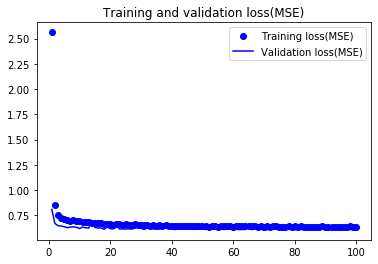

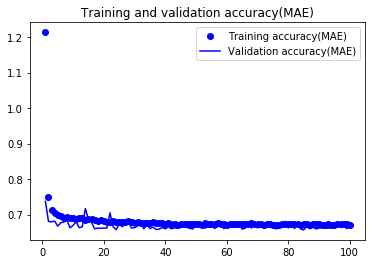

124/124 [==============================] - 0s 2ms/step - loss: 0.6234 - mean_absolute_error: 0.6738
Test MAE: 0.674
1


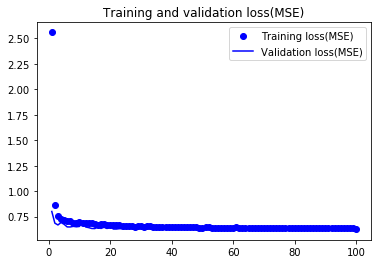

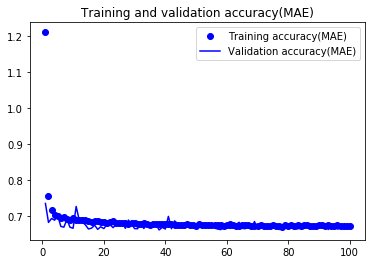

124/124 [==============================] - 0s 2ms/step - loss: 0.6174 - mean_absolute_error: 0.6640
Test MAE: 0.664
2


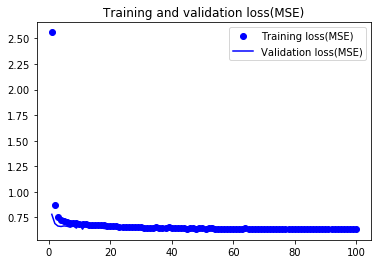

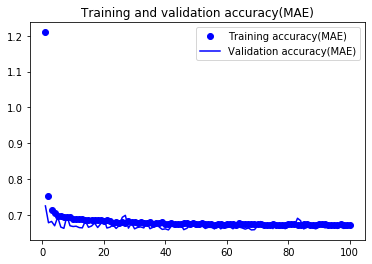

124/124 [==============================] - 0s 2ms/step - loss: 0.6162 - mean_absolute_error: 0.6667
Test MAE: 0.667
3


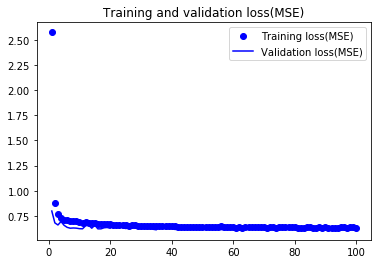

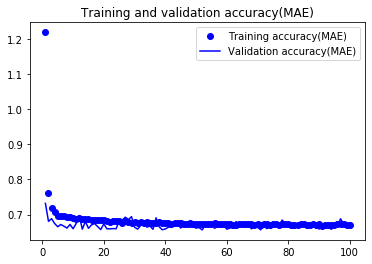

124/124 [==============================] - 0s 2ms/step - loss: 0.6326 - mean_absolute_error: 0.6791
Test MAE: 0.679
4


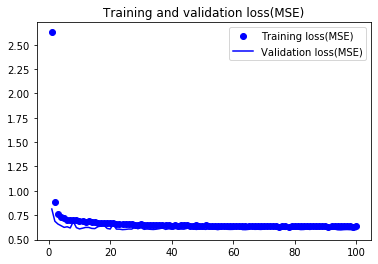

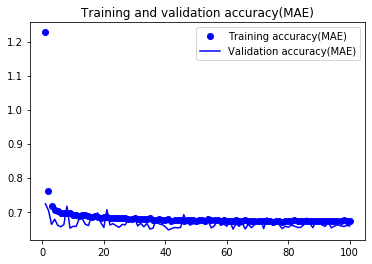

124/124 [==============================] - 0s 2ms/step - loss: 0.6425 - mean_absolute_error: 0.6744
Test MAE: 0.674
5


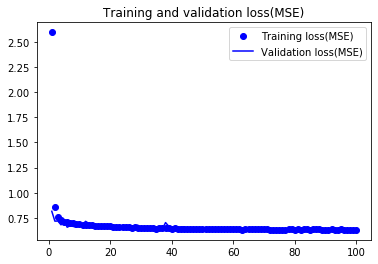

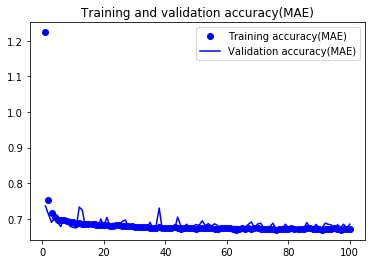

124/124 [==============================] - 0s 2ms/step - loss: 0.6161 - mean_absolute_error: 0.6724
Test MAE: 0.672
6


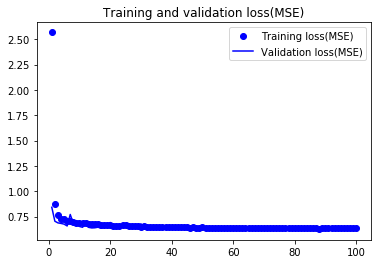

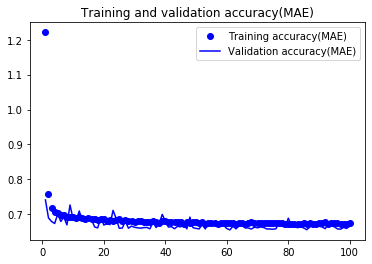

124/124 [==============================] - 0s 2ms/step - loss: 0.6225 - mean_absolute_error: 0.6717
Test MAE: 0.672
7


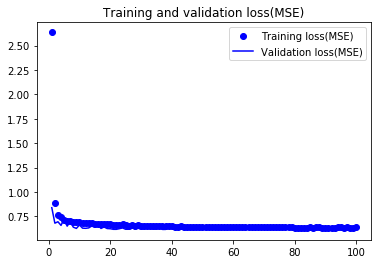

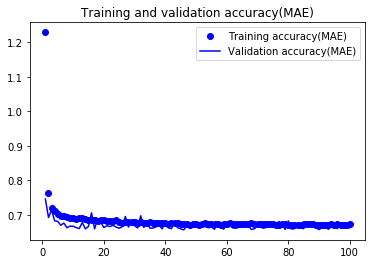

124/124 [==============================] - 0s 2ms/step - loss: 0.6240 - mean_absolute_error: 0.6657
Test MAE: 0.666
8


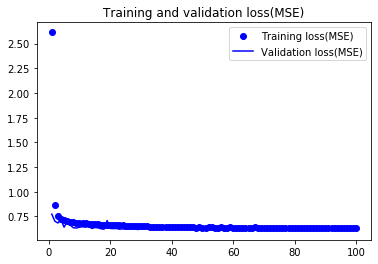

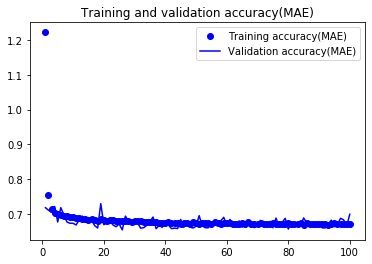

124/124 [==============================] - 0s 2ms/step - loss: 0.6630 - mean_absolute_error: 0.7055
Test MAE: 0.705
9


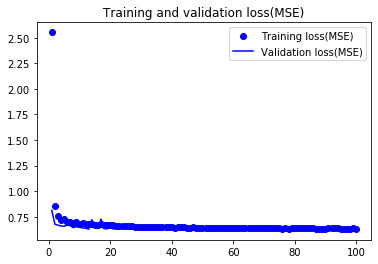

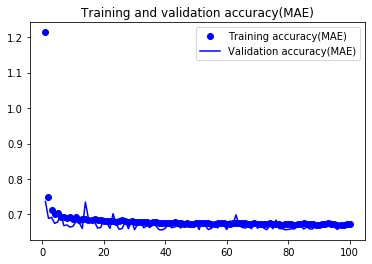

124/124 [==============================] - 0s 2ms/step - loss: 0.6221 - mean_absolute_error: 0.6756
Test MAE: 0.676
10


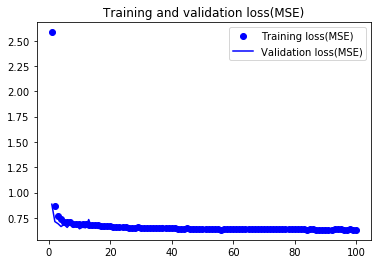

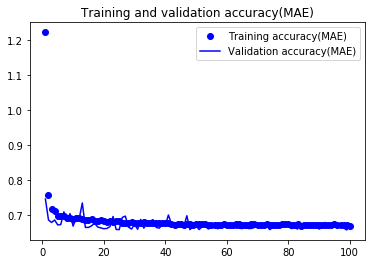

124/124 [==============================] - 0s 2ms/step - loss: 0.6128 - mean_absolute_error: 0.6655
Test MAE: 0.666
11


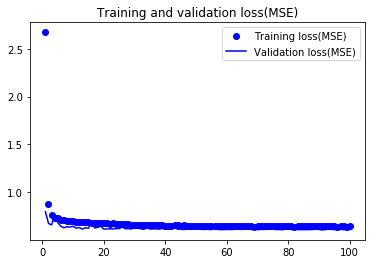

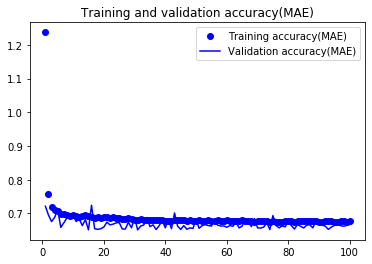

124/124 [==============================] - 0s 2ms/step - loss: 0.6014 - mean_absolute_error: 0.6630
Test MAE: 0.663
12


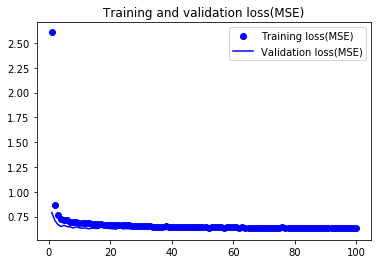

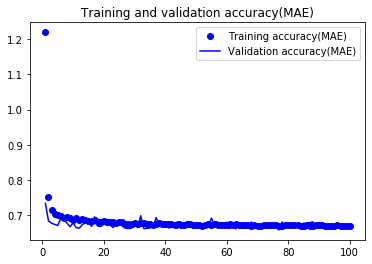

124/124 [==============================] - 0s 2ms/step - loss: 0.6238 - mean_absolute_error: 0.6622
Test MAE: 0.662
13


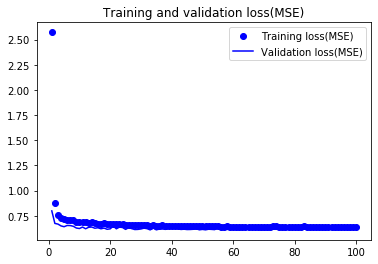

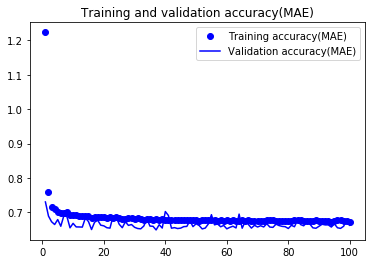

124/124 [==============================] - 0s 2ms/step - loss: 0.6200 - mean_absolute_error: 0.6723
Test MAE: 0.672
14


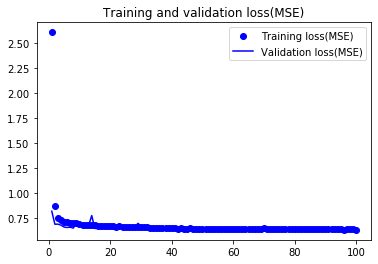

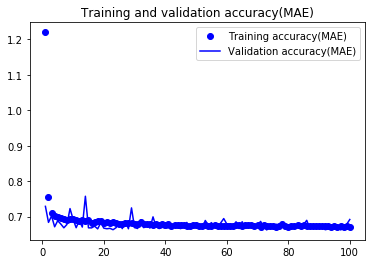

124/124 [==============================] - 0s 2ms/step - loss: 0.6228 - mean_absolute_error: 0.6836
Test MAE: 0.684
15


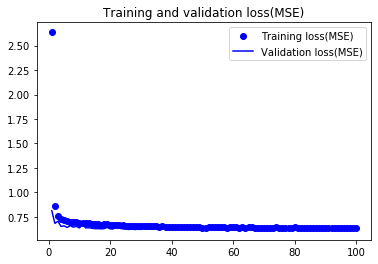

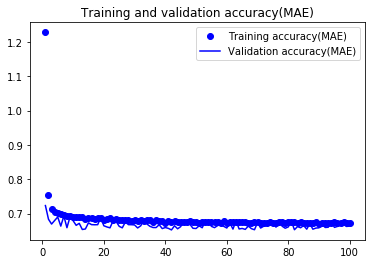

124/124 [==============================] - 0s 2ms/step - loss: 0.6250 - mean_absolute_error: 0.6765
Test MAE: 0.676
16


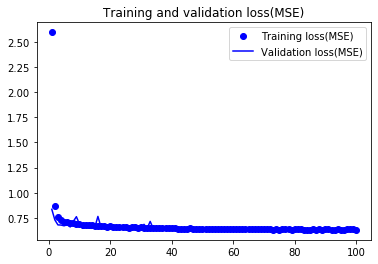

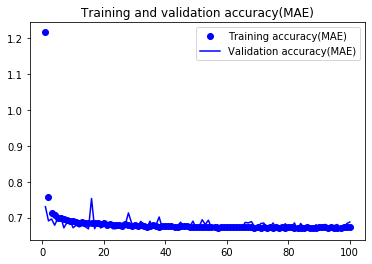

124/124 [==============================] - 0s 2ms/step - loss: 0.6112 - mean_absolute_error: 0.6756
Test MAE: 0.676
17


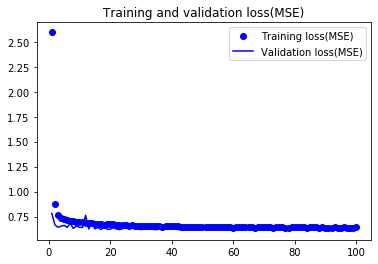

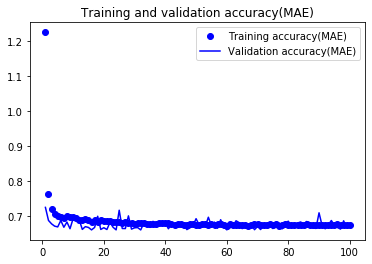

124/124 [==============================] - 0s 2ms/step - loss: 0.6055 - mean_absolute_error: 0.6605
Test MAE: 0.661
18


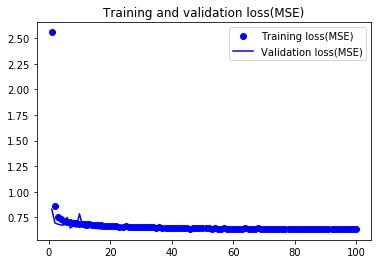

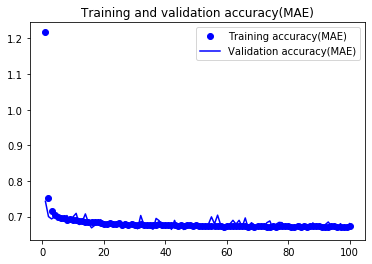

124/124 [==============================] - 0s 2ms/step - loss: 0.6177 - mean_absolute_error: 0.6716
Test MAE: 0.672
19


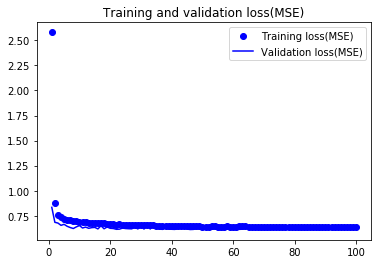

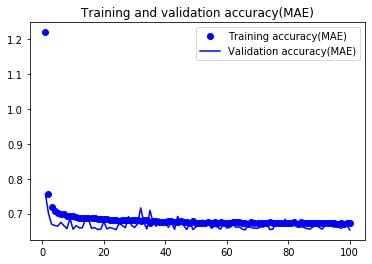

124/124 [==============================] - 0s 2ms/step - loss: 0.6269 - mean_absolute_error: 0.6596
Test MAE: 0.660
[0.6738048791885376, 0.6640282273292542, 0.6666995286941528, 0.6791479587554932, 0.6743503212928772, 0.6723620891571045, 0.6716560125350952, 0.665683925151825, 0.7054509520530701, 0.6755797863006592, 0.6655153036117554, 0.6630309224128723, 0.6622141003608704, 0.6722500324249268, 0.6835833787918091, 0.676491916179657, 0.675593912601471, 0.6605305671691895, 0.6715620160102844, 0.6596320271492004]


In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

mae_list2 = []
for i in range(20):
    print(i)
    airports = ['VABB', 'VOTV', 'VOBL', 'VECC', 'VIDP']

    def get_visibility(code):
        arr = np.load("visibility_arr.npy")
        idx = airports.index(code)
        return arr[:, idx].astype(np.float32)

    def get_era_full(param, level):
        arr = np.load("18To20{}{}_uint8.npy".format(param, level))
        return arr.astype(np.float32)

    # Import data
    params = ["z", "z", "z"]
    levels = [500, 700, 1000]

    in1_var = get_era_full(params[0], levels[0])
    in2_var = get_era_full(params[1], levels[1])
    in3_var = get_era_full(params[2], levels[2])

    # data for a given airport
    X = np.concatenate((np.expand_dims(in1_var, axis=3), np.expand_dims(in2_var, axis=3), np.expand_dims(in3_var, axis=3)), axis=3)
    Y = get_visibility('VOTV').reshape(-1, 1)

    import sklearn
    from sklearn.model_selection import train_test_split

    # In the first step we will split the data in training and remaining dataset
    X_train, X_rem, Y_train, Y_rem = train_test_split(X,Y, train_size=0.7)

    # Now since we want the valid and test size to be equal. 
    X_valid, X_test, Y_valid, Y_test = train_test_split(X_rem,Y_rem, test_size=0.5)

    #to clear space for gpu, if occupied by any process
    import tensorflow as tf
    from tensorflow.compat.v1 import ConfigProto
    from tensorflow.compat.v1 import InteractiveSession
    config = ConfigProto()
    config.gpu_options.allow_growth=True
    sess = tf.compat.v1.Session(config=config)

    conv_base = tf.keras.applications.vgg16.VGG16(
        include_top=False,
        weights="imagenet",
        input_shape=(157, 157, 3))

    # preprocess_input

    train_features = tf.keras.applications.vgg16.preprocess_input(X_train)
    val_features = tf.keras.applications.vgg16.preprocess_input(X_valid)
    test_features = tf.keras.applications.vgg16.preprocess_input(X_test)

    train_features = conv_base.predict(X_train)
    val_features = conv_base.predict(X_valid)
    test_features = conv_base.predict(X_test)

    train_labels = Y_train
    val_labels = Y_valid
    test_labels = Y_test

    # model building
    inputs = keras.Input(shape = (4,4,512))
    x = layers.GlobalAveragePooling2D()(inputs)
    x = layers.BatchNormalization()(x)
    top_dropout_rate = 0.4
    x = layers.Dropout(top_dropout_rate)(x)
    outputs = layers.Dense(1)(x)
    model = keras.Model(inputs, outputs, name="vgg16")

    # compiling the model
    opt =tf.keras.optimizers.RMSprop(learning_rate=0.002)
    model.compile(loss = 'mse', optimizer = opt, metrics = [tf.keras.losses.MeanAbsoluteError()])
    callbacks = [keras.callbacks.ModelCheckpoint(filepath = f"vVOTV {i}_vgg16.keras",
                                                save_best_only = True, monitor = "val_loss")]

    history = model.fit(train_features, train_labels, batch_size = 128, epochs = 100, validation_data = (val_features, val_labels), verbose = 0, callbacks = callbacks)

    import matplotlib.pyplot as plt
    %matplotlib inline
    f1 = plt.figure();
    mae = history.history["mean_absolute_error"]
    loss = history.history["loss"]
    val_mae = history.history["val_mean_absolute_error"]
    val_loss = history.history["val_loss"]
    epochs = range(1, len(loss) + 1)

    plt.plot(epochs, loss, "bo", label = "Training loss(MSE)");
    plt.plot(epochs, val_loss, "b", label = "Validation loss(MSE)");
    plt.title("Training and validation loss(MSE)");
    plt.legend();

    f2 = plt.figure();
    plt.plot(epochs, mae, "bo", label = "Training accuracy(MAE)");
    plt.plot(epochs, val_mae, "b", label = "Validation accuracy(MAE)");
    plt.title("Training and validation accuracy(MAE)");
    plt.legend();
    plt.show();

    test_loss, test_mae = model.evaluate(test_features, test_labels)
    print(f"Test MAE: {test_mae:.3f}")
    mae_list2.append(test_mae)
    f1.savefig(f"vVOTV{i}_vgg16.jpg", bbox_inches='tight', dpi=600);
    f2.savefig(f"vVOTV{i}_vgg16.jpg", bbox_inches='tight', dpi=600);
    
print(mae_list2)

In [4]:
b = np.array(mae_list2)
np.mean(b), np.std(b), b

(0.6719583928585052,
 0.009984248568115257,
 array([0.67380488, 0.66402823, 0.66669953, 0.67914796, 0.67435032,
        0.67236209, 0.67165601, 0.66568393, 0.70545095, 0.67557979,
        0.6655153 , 0.66303092, 0.6622141 , 0.67225003, 0.68358338,
        0.67649192, 0.67559391, 0.66053057, 0.67156202, 0.65963203]))

0


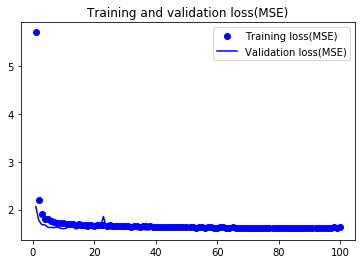

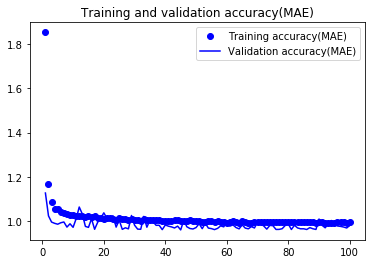

124/124 [==============================] - 0s 2ms/step - loss: 1.5936 - mean_absolute_error: 0.9854
Test MAE: 0.985
1


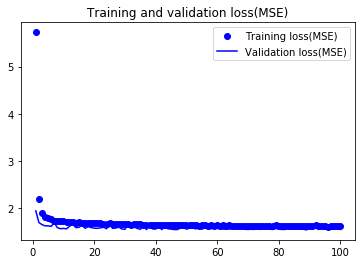

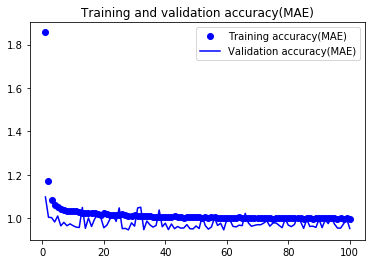

124/124 [==============================] - 0s 2ms/step - loss: 1.5625 - mean_absolute_error: 0.9603
Test MAE: 0.960
2


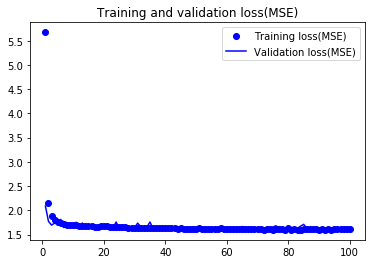

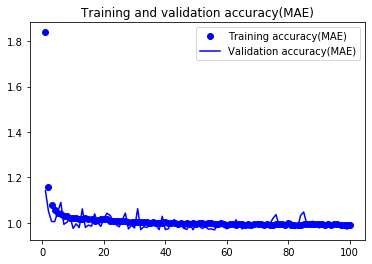

124/124 [==============================] - 0s 2ms/step - loss: 1.6038 - mean_absolute_error: 0.9802
Test MAE: 0.980
3


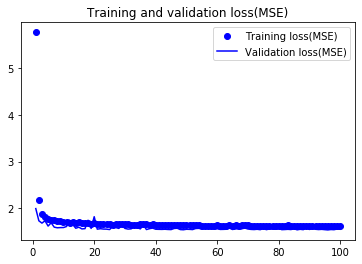

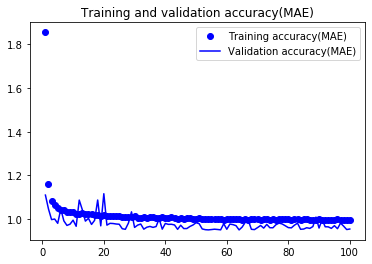

124/124 [==============================] - 0s 2ms/step - loss: 1.5875 - mean_absolute_error: 0.9618
Test MAE: 0.962
4


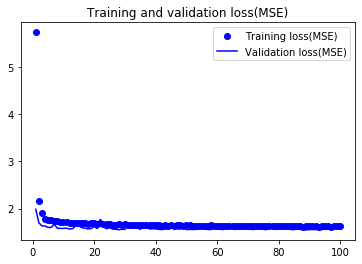

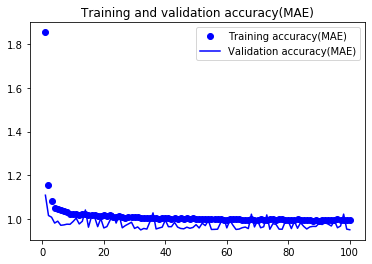

124/124 [==============================] - 0s 2ms/step - loss: 1.6100 - mean_absolute_error: 0.9644
Test MAE: 0.964
5


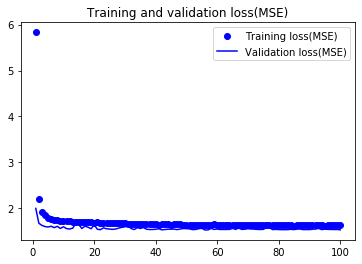

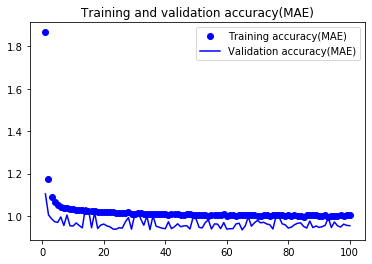

124/124 [==============================] - 0s 2ms/step - loss: 1.5636 - mean_absolute_error: 0.9708
Test MAE: 0.971
6


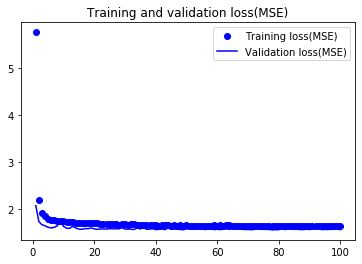

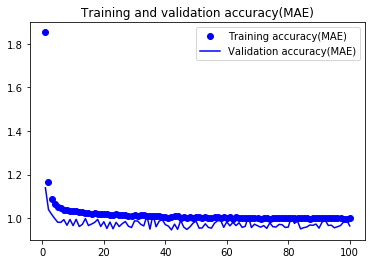

124/124 [==============================] - 0s 2ms/step - loss: 1.5323 - mean_absolute_error: 0.9664
Test MAE: 0.966
7


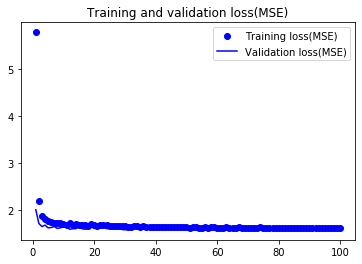

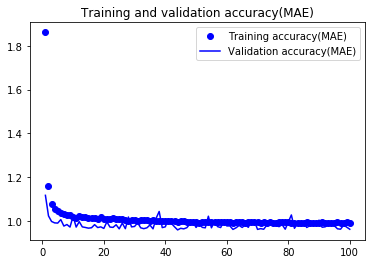

124/124 [==============================] - 0s 2ms/step - loss: 1.6191 - mean_absolute_error: 0.9654
Test MAE: 0.965
8


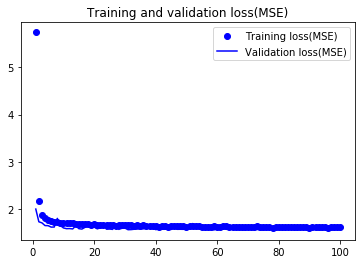

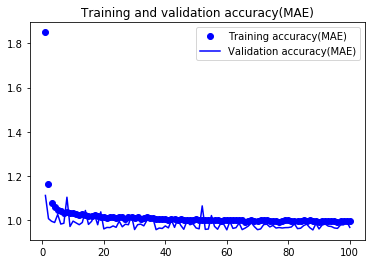

124/124 [==============================] - 0s 2ms/step - loss: 1.5452 - mean_absolute_error: 0.9611
Test MAE: 0.961
9


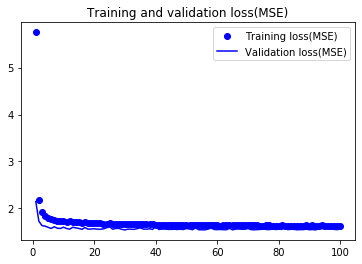

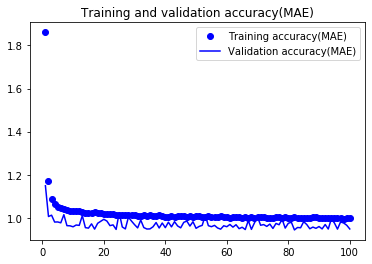

124/124 [==============================] - 0s 2ms/step - loss: 1.5591 - mean_absolute_error: 0.9511
Test MAE: 0.951
10


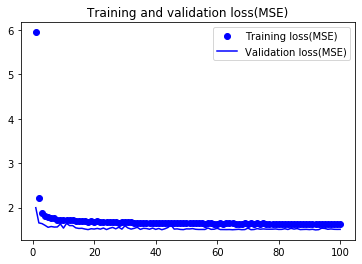

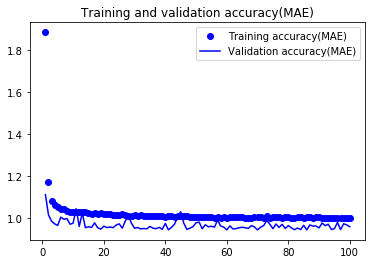

124/124 [==============================] - 0s 2ms/step - loss: 1.5871 - mean_absolute_error: 0.9741
Test MAE: 0.974
11


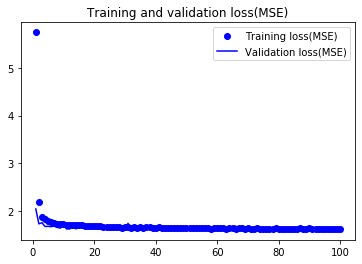

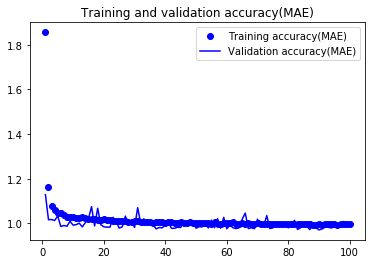

124/124 [==============================] - 0s 2ms/step - loss: 1.5343 - mean_absolute_error: 0.9558
Test MAE: 0.956
12


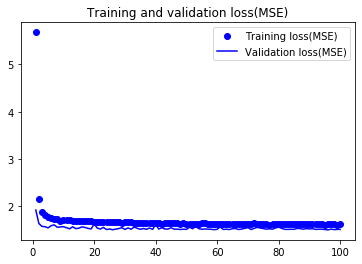

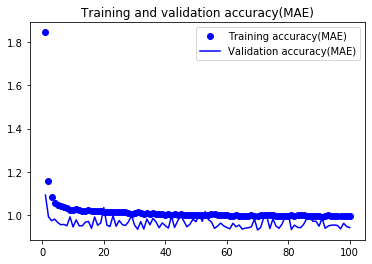

124/124 [==============================] - 0s 2ms/step - loss: 1.6301 - mean_absolute_error: 0.9918
Test MAE: 0.992
13


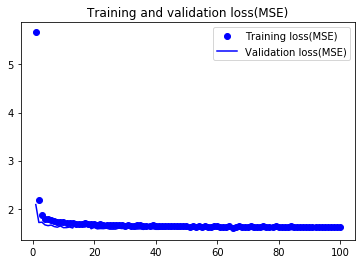

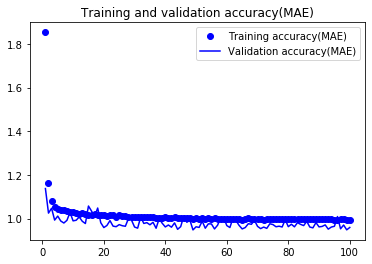

124/124 [==============================] - 0s 2ms/step - loss: 1.5886 - mean_absolute_error: 0.9724
Test MAE: 0.972
14


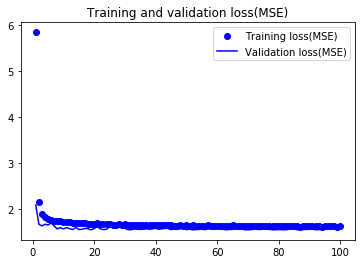

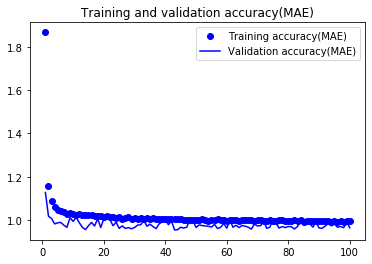

124/124 [==============================] - 0s 2ms/step - loss: 1.6046 - mean_absolute_error: 0.9713
Test MAE: 0.971
15


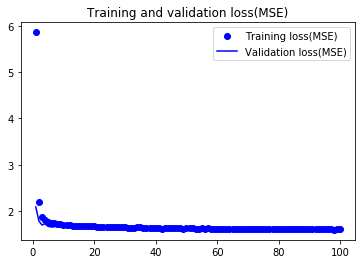

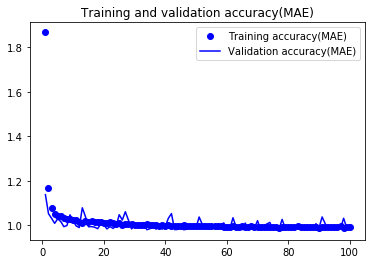

124/124 [==============================] - 0s 2ms/step - loss: 1.5891 - mean_absolute_error: 0.9900
Test MAE: 0.990
16


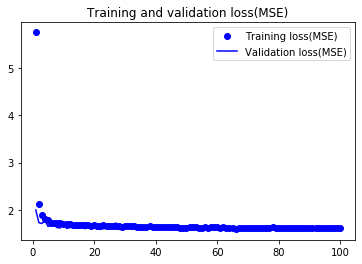

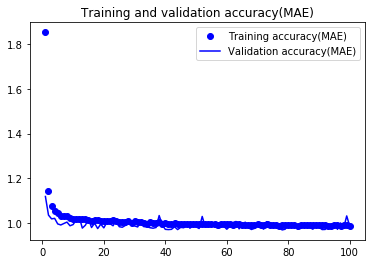

124/124 [==============================] - 0s 2ms/step - loss: 1.5923 - mean_absolute_error: 0.9846
Test MAE: 0.985
17


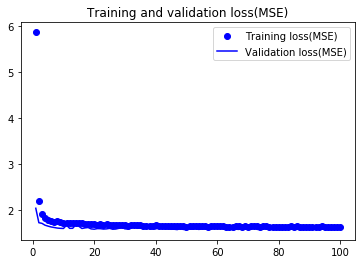

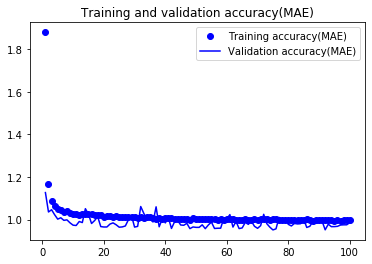

124/124 [==============================] - 0s 2ms/step - loss: 1.5413 - mean_absolute_error: 0.9726
Test MAE: 0.973
18


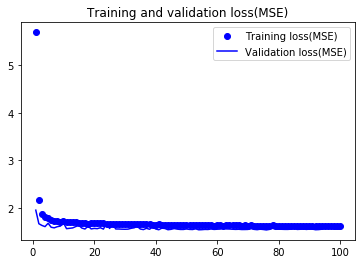

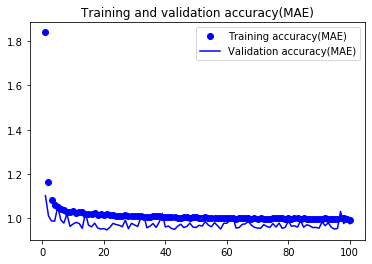

124/124 [==============================] - 0s 2ms/step - loss: 1.5612 - mean_absolute_error: 0.9804
Test MAE: 0.980
19


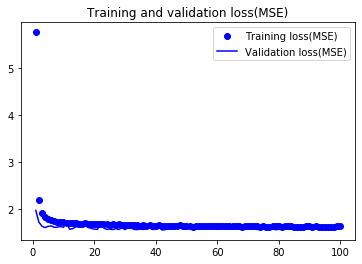

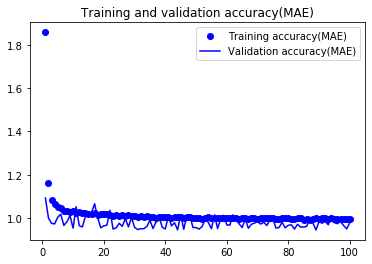

124/124 [==============================] - 0s 2ms/step - loss: 1.6002 - mean_absolute_error: 0.9977
Test MAE: 0.998
[0.9854229092597961, 0.9603323340415955, 0.9802379012107849, 0.9618020057678223, 0.9643927216529846, 0.9708128571510315, 0.9664492011070251, 0.965401291847229, 0.9610954523086548, 0.9511414170265198, 0.974118709564209, 0.9558197259902954, 0.9917928576469421, 0.9724095463752747, 0.9713209271430969, 0.9900380373001099, 0.9845808744430542, 0.9725766777992249, 0.9803978204727173, 0.9977016448974609]


In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

mae_list3 = []
for i in range(20):
    print(i)
    airports = ['VABB', 'VOTV', 'VOBL', 'VECC', 'VIDP']

    def get_visibility(code):
        arr = np.load("visibility_arr.npy")
        idx = airports.index(code)
        return arr[:, idx].astype(np.float32)

    def get_era_full(param, level):
        arr = np.load("18To20{}{}_uint8.npy".format(param, level))
        return arr.astype(np.float32)

    # Import data
    params = ["z", "z", "z"]
    levels = [500, 700, 1000]

    in1_var = get_era_full(params[0], levels[0])
    in2_var = get_era_full(params[1], levels[1])
    in3_var = get_era_full(params[2], levels[2])

    # data for a given airport
    X = np.concatenate((np.expand_dims(in1_var, axis=3), np.expand_dims(in2_var, axis=3), np.expand_dims(in3_var, axis=3)), axis=3)
    Y = get_visibility('VOBL').reshape(-1, 1)

    import sklearn
    from sklearn.model_selection import train_test_split

    # In the first step we will split the data in training and remaining dataset
    X_train, X_rem, Y_train, Y_rem = train_test_split(X,Y, train_size=0.7)

    # Now since we want the valid and test size to be equal. 
    X_valid, X_test, Y_valid, Y_test = train_test_split(X_rem,Y_rem, test_size=0.5)

    #to clear space for gpu, if occupied by any process
    import tensorflow as tf
    from tensorflow.compat.v1 import ConfigProto
    from tensorflow.compat.v1 import InteractiveSession
    config = ConfigProto()
    config.gpu_options.allow_growth=True
    sess = tf.compat.v1.Session(config=config)

    conv_base = tf.keras.applications.vgg16.VGG16(
        include_top=False,
        weights="imagenet",
        input_shape=(157, 157, 3))

    # preprocess_input

    train_features = tf.keras.applications.vgg16.preprocess_input(X_train)
    val_features = tf.keras.applications.vgg16.preprocess_input(X_valid)
    test_features = tf.keras.applications.vgg16.preprocess_input(X_test)

    train_features = conv_base.predict(X_train)
    val_features = conv_base.predict(X_valid)
    test_features = conv_base.predict(X_test)

    train_labels = Y_train
    val_labels = Y_valid
    test_labels = Y_test

    # model building
    inputs = keras.Input(shape = (4,4,512))
    x = layers.GlobalAveragePooling2D()(inputs)
    x = layers.BatchNormalization()(x)
    top_dropout_rate = 0.4
    x = layers.Dropout(top_dropout_rate)(x)
    outputs = layers.Dense(1)(x)
    model = keras.Model(inputs, outputs, name="vgg16")

    # compiling the model
    opt =tf.keras.optimizers.RMSprop(learning_rate=0.002)
    model.compile(loss = 'mse', optimizer = opt, metrics = [tf.keras.losses.MeanAbsoluteError()])
    callbacks = [keras.callbacks.ModelCheckpoint(filepath = f"vVABB{i}_vgg16.keras",
                                                save_best_only = True, monitor = "val_loss")]

    history = model.fit(train_features, train_labels, batch_size = 128, epochs = 100, validation_data = (val_features, val_labels), verbose = 0, callbacks = callbacks)

    import matplotlib.pyplot as plt
    %matplotlib inline
    f1 = plt.figure();
    mae = history.history["mean_absolute_error"]
    loss = history.history["loss"]
    val_mae = history.history["val_mean_absolute_error"]
    val_loss = history.history["val_loss"]
    epochs = range(1, len(loss) + 1)

    plt.plot(epochs, loss, "bo", label = "Training loss(MSE)");
    plt.plot(epochs, val_loss, "b", label = "Validation loss(MSE)");
    plt.title("Training and validation loss(MSE)");
    plt.legend();

    f2 = plt.figure();
    plt.plot(epochs, mae, "bo", label = "Training accuracy(MAE)");
    plt.plot(epochs, val_mae, "b", label = "Validation accuracy(MAE)");
    plt.title("Training and validation accuracy(MAE)");
    plt.legend();
    plt.show();

    test_loss, test_mae = model.evaluate(test_features, test_labels)
    print(f"Test MAE: {test_mae:.3f}")
    mae_list3.append(test_mae)
    f1.savefig(f"vVOBL{i}_vgg16.jpg", bbox_inches='tight', dpi=600);
    f2.savefig(f"vVOBL{i}_vgg16.jpg", bbox_inches='tight', dpi=600);
    
print(mae_list3)

In [6]:
c = np.array(mae_list3)
np.mean(c), np.std(c), c

(0.9728922456502914,
 0.012315902117437376,
 array([0.98542291, 0.96033233, 0.9802379 , 0.96180201, 0.96439272,
        0.97081286, 0.9664492 , 0.96540129, 0.96109545, 0.95114142,
        0.97411871, 0.95581973, 0.99179286, 0.97240955, 0.97132093,
        0.99003804, 0.98458087, 0.97257668, 0.98039782, 0.99770164]))

0


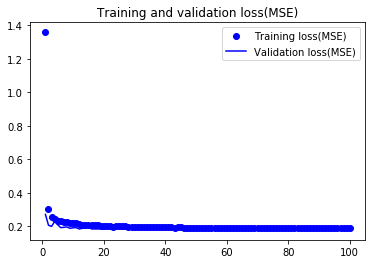

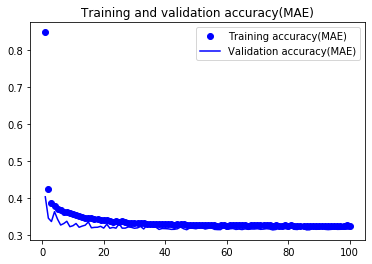

124/124 [==============================] - 0s 2ms/step - loss: 0.1744 - mean_absolute_error: 0.3133
Test MAE: 0.313
1


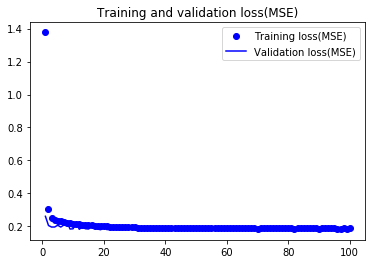

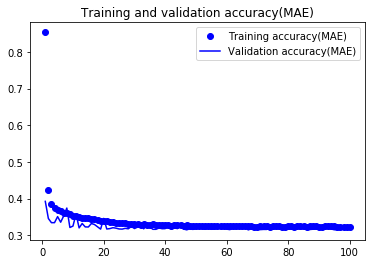

124/124 [==============================] - 0s 2ms/step - loss: 0.1893 - mean_absolute_error: 0.3206
Test MAE: 0.321
2


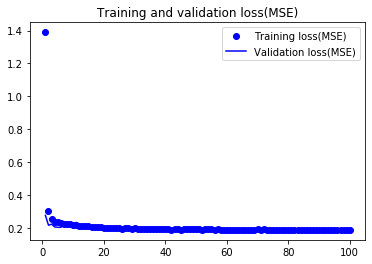

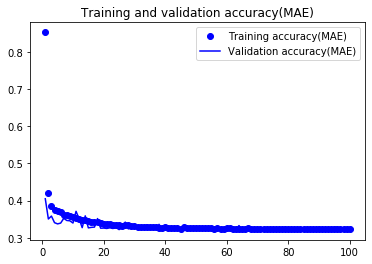

124/124 [==============================] - 0s 2ms/step - loss: 0.1831 - mean_absolute_error: 0.3193
Test MAE: 0.319
3


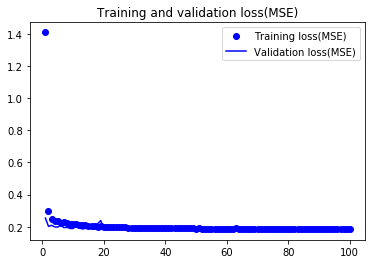

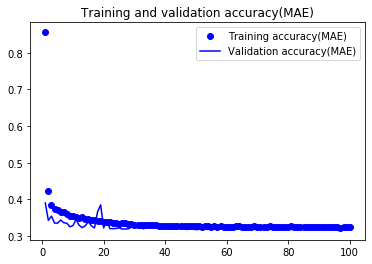

124/124 [==============================] - 0s 2ms/step - loss: 0.1856 - mean_absolute_error: 0.3179
Test MAE: 0.318
4


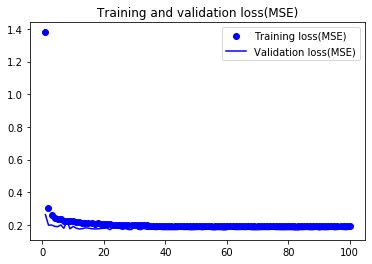

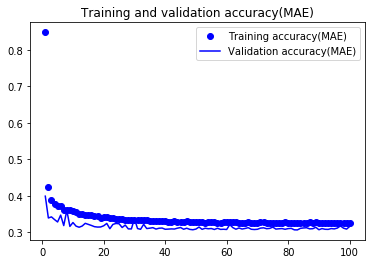

124/124 [==============================] - 0s 2ms/step - loss: 0.1841 - mean_absolute_error: 0.3250
Test MAE: 0.325
5


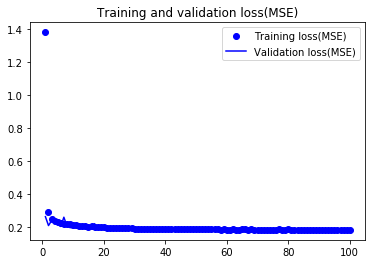

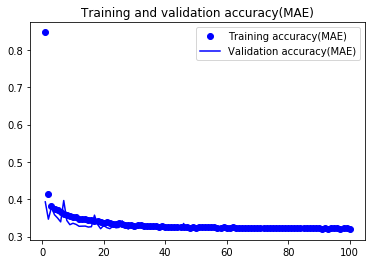

124/124 [==============================] - 0s 2ms/step - loss: 0.1891 - mean_absolute_error: 0.3243
Test MAE: 0.324
6


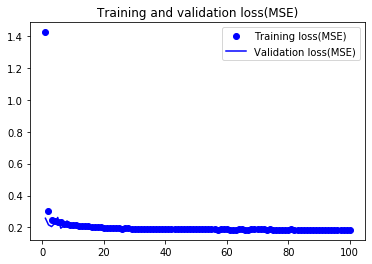

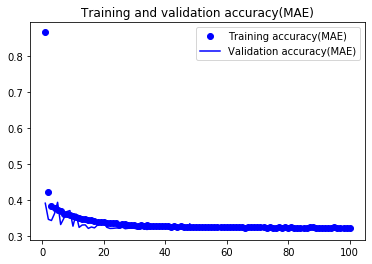

124/124 [==============================] - 0s 2ms/step - loss: 0.1877 - mean_absolute_error: 0.3165
Test MAE: 0.316
7


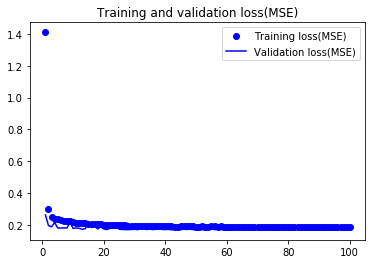

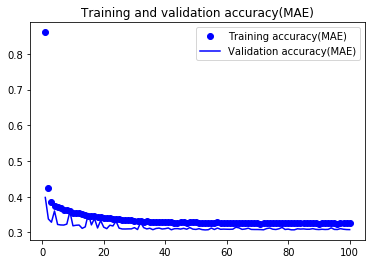

124/124 [==============================] - 0s 2ms/step - loss: 0.1849 - mean_absolute_error: 0.3199
Test MAE: 0.320
8


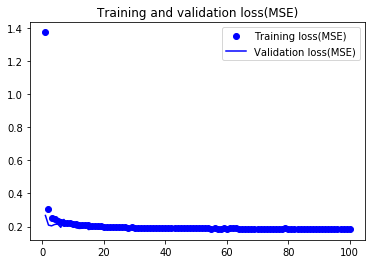

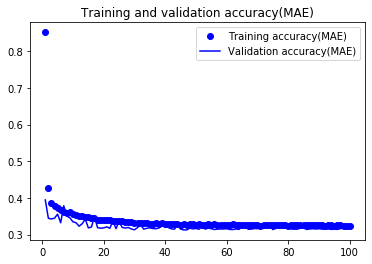

124/124 [==============================] - 0s 2ms/step - loss: 0.1877 - mean_absolute_error: 0.3202
Test MAE: 0.320
9


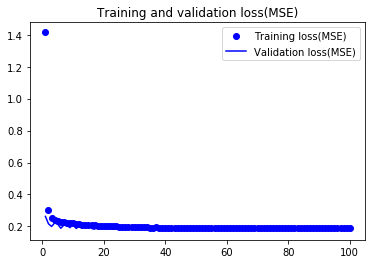

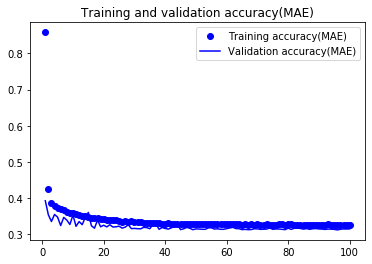

124/124 [==============================] - 0s 2ms/step - loss: 0.1811 - mean_absolute_error: 0.3138
Test MAE: 0.314
10


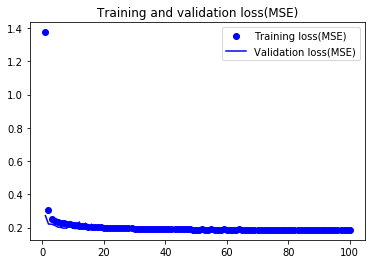

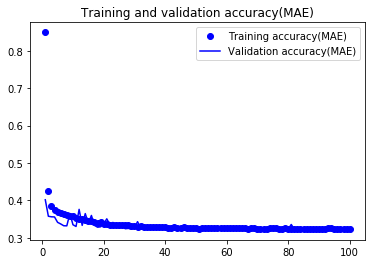

124/124 [==============================] - 0s 2ms/step - loss: 0.1834 - mean_absolute_error: 0.3176
Test MAE: 0.318
11


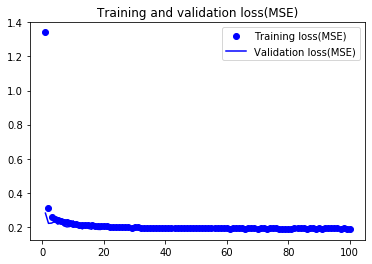

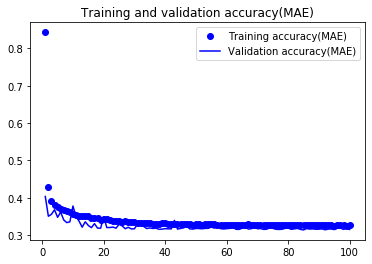

124/124 [==============================] - 0s 2ms/step - loss: 0.1705 - mean_absolute_error: 0.3106
Test MAE: 0.311
12


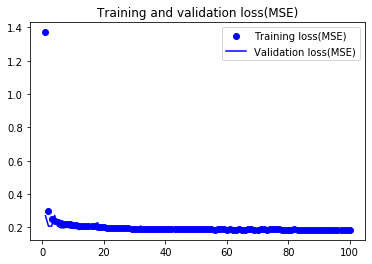

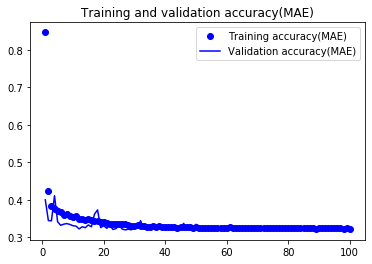

124/124 [==============================] - 0s 2ms/step - loss: 0.1820 - mean_absolute_error: 0.3187
Test MAE: 0.319
13


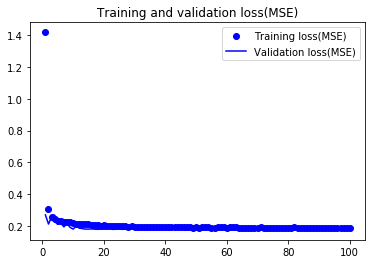

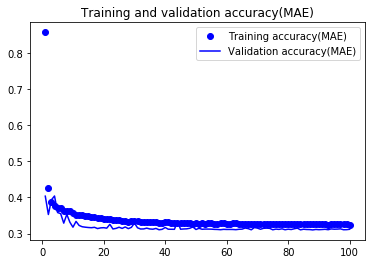

124/124 [==============================] - 0s 2ms/step - loss: 0.1855 - mean_absolute_error: 0.3193
Test MAE: 0.319
14


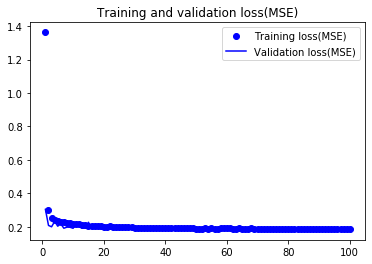

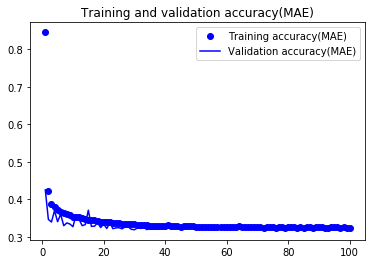

124/124 [==============================] - 0s 2ms/step - loss: 0.1790 - mean_absolute_error: 0.3121
Test MAE: 0.312
15


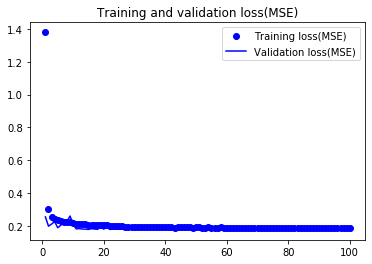

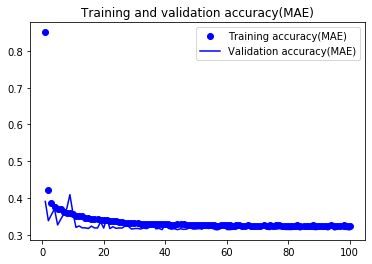

124/124 [==============================] - 0s 2ms/step - loss: 0.1846 - mean_absolute_error: 0.3201
Test MAE: 0.320
16


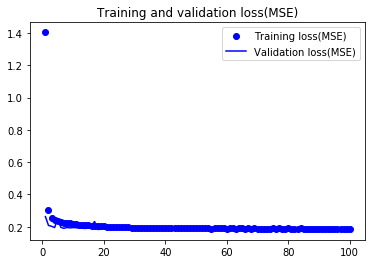

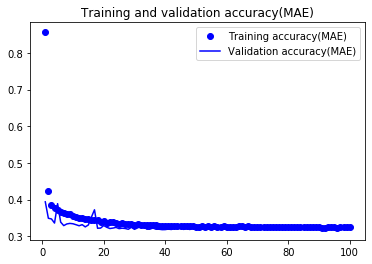

124/124 [==============================] - 0s 2ms/step - loss: 0.1808 - mean_absolute_error: 0.3212
Test MAE: 0.321
17


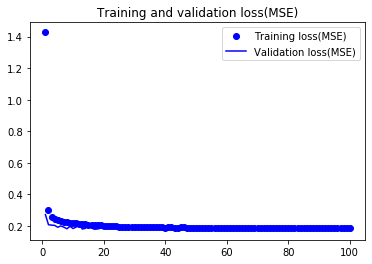

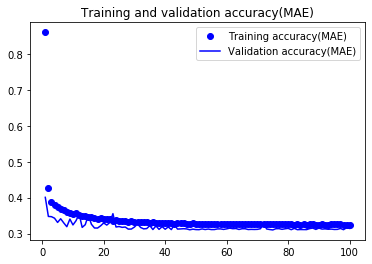

124/124 [==============================] - 0s 2ms/step - loss: 0.1865 - mean_absolute_error: 0.3215
Test MAE: 0.321
18


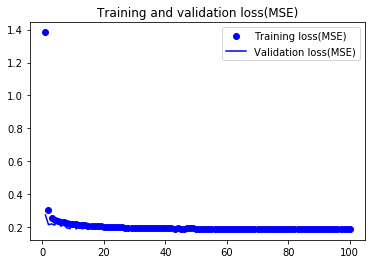

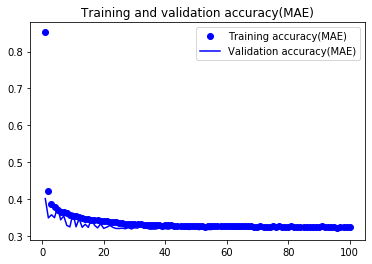

124/124 [==============================] - 0s 2ms/step - loss: 0.1812 - mean_absolute_error: 0.3149
Test MAE: 0.315
19


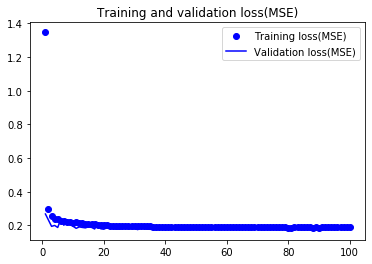

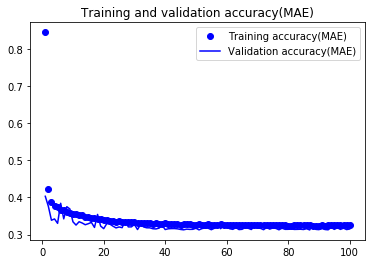

124/124 [==============================] - 0s 2ms/step - loss: 0.1886 - mean_absolute_error: 0.3212
Test MAE: 0.321
[0.31330639123916626, 0.32063910365104675, 0.3193325698375702, 0.3179191052913666, 0.32501327991485596, 0.3242916464805603, 0.31646761298179626, 0.3198592960834503, 0.320172518491745, 0.3138423562049866, 0.317608505487442, 0.3106006681919098, 0.3187083899974823, 0.3192809820175171, 0.3121333718299866, 0.320095419883728, 0.3211655914783478, 0.32146018743515015, 0.3148811459541321, 0.32119452953338623]


In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

mae_list4 = []
for i in range(20):
    print(i)
    airports = ['VABB', 'VOTV', 'VOBL', 'VECC', 'VIDP']

    def get_visibility(code):
        arr = np.load("visibility_arr.npy")
        idx = airports.index(code)
        return arr[:, idx].astype(np.float32)

    def get_era_full(param, level):
        arr = np.load("18To20{}{}_uint8.npy".format(param, level))
        return arr.astype(np.float32)

    # Import data
    params = ["z", "z", "z"]
    levels = [500, 700, 1000]

    in1_var = get_era_full(params[0], levels[0])
    in2_var = get_era_full(params[1], levels[1])
    in3_var = get_era_full(params[2], levels[2])

    # data for a given airport
    X = np.concatenate((np.expand_dims(in1_var, axis=3), np.expand_dims(in2_var, axis=3), np.expand_dims(in3_var, axis=3)), axis=3)
    Y = get_visibility('VECC').reshape(-1, 1)

    import sklearn
    from sklearn.model_selection import train_test_split

    # In the first step we will split the data in training and remaining dataset
    X_train, X_rem, Y_train, Y_rem = train_test_split(X,Y, train_size=0.7)

    # Now since we want the valid and test size to be equal. 
    X_valid, X_test, Y_valid, Y_test = train_test_split(X_rem,Y_rem, test_size=0.5)

    #to clear space for gpu, if occupied by any process
    import tensorflow as tf
    from tensorflow.compat.v1 import ConfigProto
    from tensorflow.compat.v1 import InteractiveSession
    config = ConfigProto()
    config.gpu_options.allow_growth=True
    sess = tf.compat.v1.Session(config=config)

    conv_base = tf.keras.applications.vgg16.VGG16(
        include_top=False,
        weights="imagenet",
        input_shape=(157, 157, 3))

    # preprocess_input

    train_features = tf.keras.applications.vgg16.preprocess_input(X_train)
    val_features = tf.keras.applications.vgg16.preprocess_input(X_valid)
    test_features = tf.keras.applications.vgg16.preprocess_input(X_test)

    train_features = conv_base.predict(X_train)
    val_features = conv_base.predict(X_valid)
    test_features = conv_base.predict(X_test)

    train_labels = Y_train
    val_labels = Y_valid
    test_labels = Y_test

    # model building
    inputs = keras.Input(shape = (4,4,512))
    x = layers.GlobalAveragePooling2D()(inputs)
    x = layers.BatchNormalization()(x)
    top_dropout_rate = 0.4
    x = layers.Dropout(top_dropout_rate)(x)
    outputs = layers.Dense(1)(x)
    model = keras.Model(inputs, outputs, name="vgg16")

    # compiling the model
    opt =tf.keras.optimizers.RMSprop(learning_rate=0.002)
    model.compile(loss = 'mse', optimizer = opt, metrics = [tf.keras.losses.MeanAbsoluteError()])
    callbacks = [keras.callbacks.ModelCheckpoint(filepath = f"vVECC{i}_vgg16.keras",
                                                save_best_only = True, monitor = "val_loss")]

    history = model.fit(train_features, train_labels, batch_size = 128, epochs = 100, validation_data = (val_features, val_labels), verbose = 0, callbacks = callbacks)

    import matplotlib.pyplot as plt
    %matplotlib inline
    f1 = plt.figure();
    mae = history.history["mean_absolute_error"]
    loss = history.history["loss"]
    val_mae = history.history["val_mean_absolute_error"]
    val_loss = history.history["val_loss"]
    epochs = range(1, len(loss) + 1)

    plt.plot(epochs, loss, "bo", label = "Training loss(MSE)");
    plt.plot(epochs, val_loss, "b", label = "Validation loss(MSE)");
    plt.title("Training and validation loss(MSE)");
    plt.legend();

    f2 = plt.figure()
    plt.plot(epochs, mae, "bo", label = "Training accuracy(MAE)");
    plt.plot(epochs, val_mae, "b", label = "Validation accuracy(MAE)");
    plt.title("Training and validation accuracy(MAE)");
    plt.legend();
    plt.show();

    test_loss, test_mae = model.evaluate(test_features, test_labels)
    print(f"Test MAE: {test_mae:.3f}")
    mae_list4.append(test_mae)
    f1.savefig(f"vVECC{i}_vgg16.jpg", bbox_inches='tight', dpi=600);
    f2.savefig(f"vVECC{i}_vgg16.jpg", bbox_inches='tight', dpi=600);
    
print(mae_list4)

In [8]:
d = np.array(mae_list4)
np.mean(d), np.std(d), d

(0.31839863359928133,
 0.00375473861104308,
 array([0.31330639, 0.3206391 , 0.31933257, 0.31791911, 0.32501328,
        0.32429165, 0.31646761, 0.3198593 , 0.32017252, 0.31384236,
        0.31760851, 0.31060067, 0.31870839, 0.31928098, 0.31213337,
        0.32009542, 0.32116559, 0.32146019, 0.31488115, 0.32119453]))

0


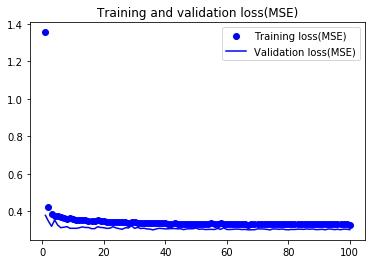

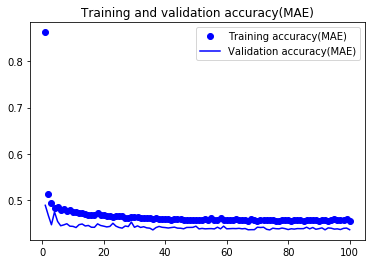

124/124 [==============================] - 0s 2ms/step - loss: 0.3149 - mean_absolute_error: 0.4467
Test MAE: 0.447
1


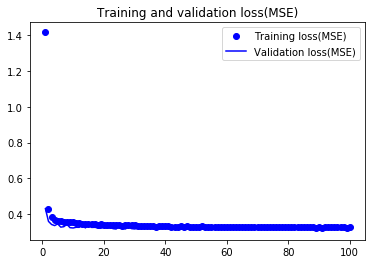

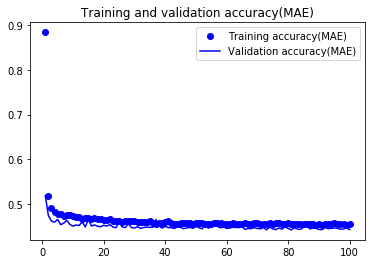

124/124 [==============================] - 0s 2ms/step - loss: 0.3101 - mean_absolute_error: 0.4421
Test MAE: 0.442
2


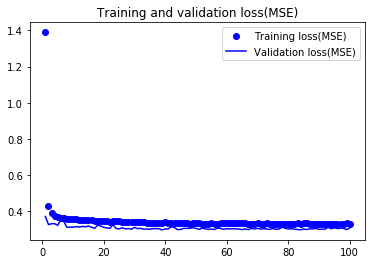

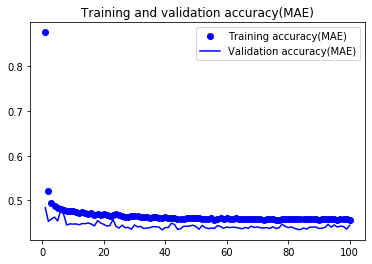

124/124 [==============================] - 0s 2ms/step - loss: 0.3080 - mean_absolute_error: 0.4420
Test MAE: 0.442
3


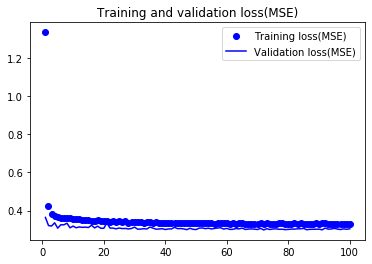

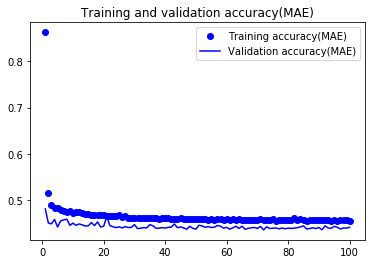

124/124 [==============================] - 0s 2ms/step - loss: 0.3127 - mean_absolute_error: 0.4447
Test MAE: 0.445
4


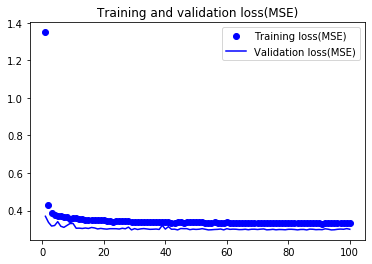

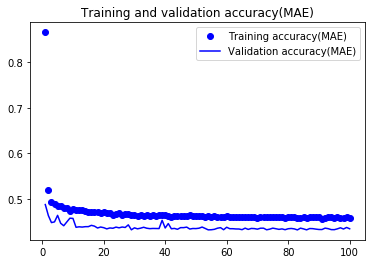

124/124 [==============================] - 0s 2ms/step - loss: 0.3009 - mean_absolute_error: 0.4374
Test MAE: 0.437
5


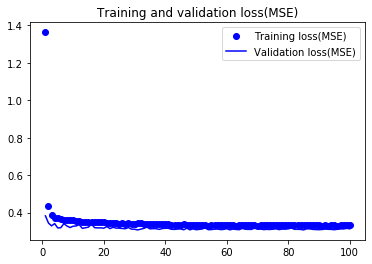

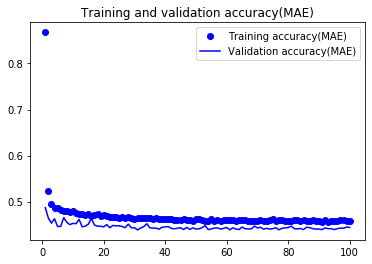

124/124 [==============================] - 0s 2ms/step - loss: 0.2963 - mean_absolute_error: 0.4331
Test MAE: 0.433
6


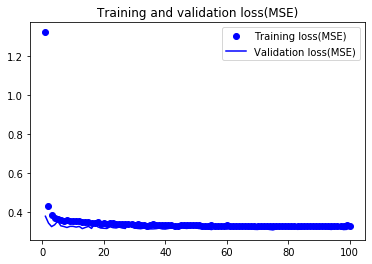

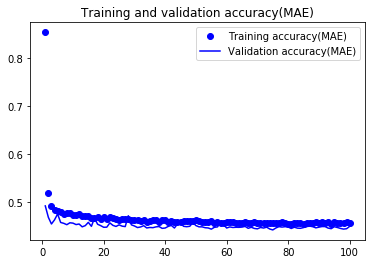

124/124 [==============================] - 0s 2ms/step - loss: 0.3126 - mean_absolute_error: 0.4474
Test MAE: 0.447
7


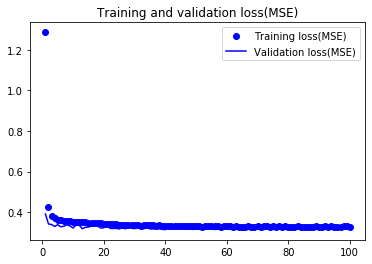

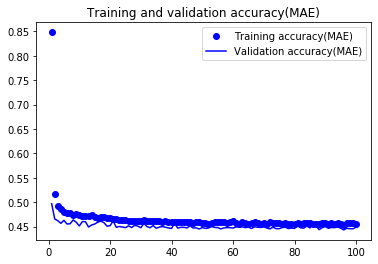

124/124 [==============================] - 0s 2ms/step - loss: 0.3098 - mean_absolute_error: 0.4404
Test MAE: 0.440
8


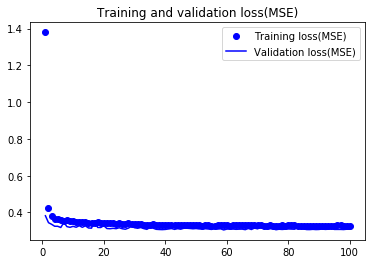

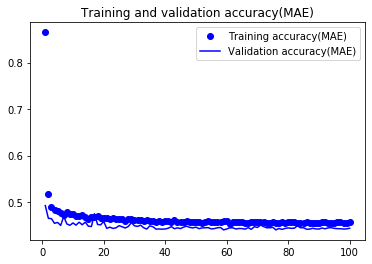

124/124 [==============================] - 0s 2ms/step - loss: 0.3137 - mean_absolute_error: 0.4461
Test MAE: 0.446
9


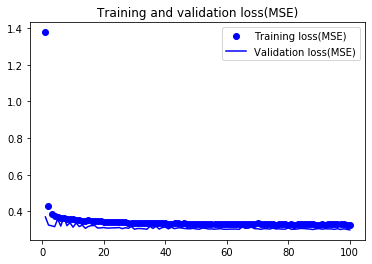

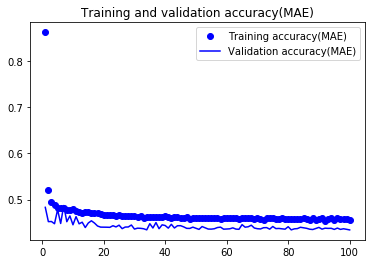

124/124 [==============================] - 0s 2ms/step - loss: 0.3057 - mean_absolute_error: 0.4395
Test MAE: 0.439
10


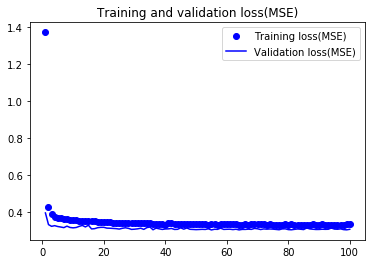

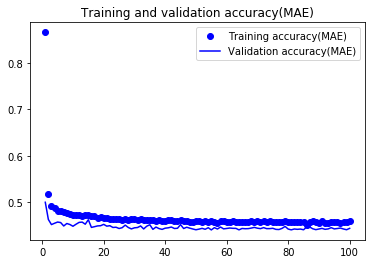

124/124 [==============================] - 0s 2ms/step - loss: 0.3063 - mean_absolute_error: 0.4428
Test MAE: 0.443
11


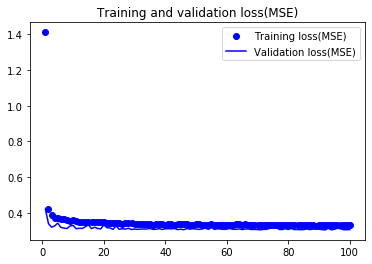

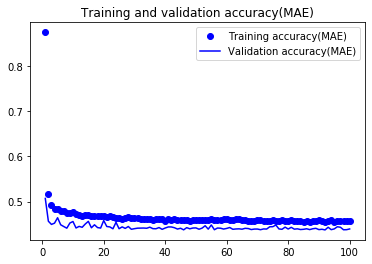

124/124 [==============================] - 0s 2ms/step - loss: 0.3060 - mean_absolute_error: 0.4401
Test MAE: 0.440
12


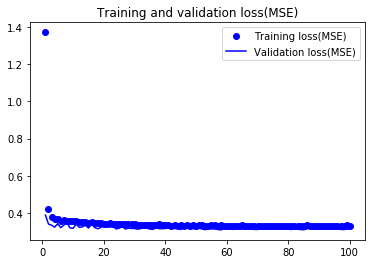

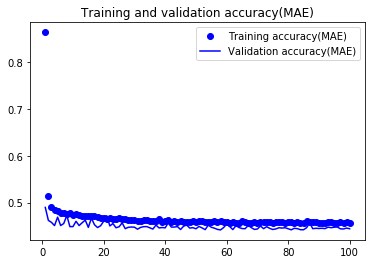

124/124 [==============================] - 0s 2ms/step - loss: 0.3078 - mean_absolute_error: 0.4387
Test MAE: 0.439
13


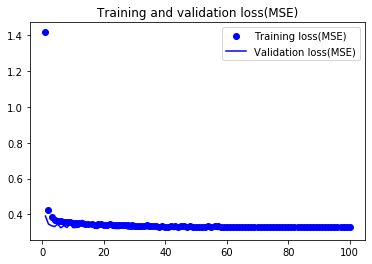

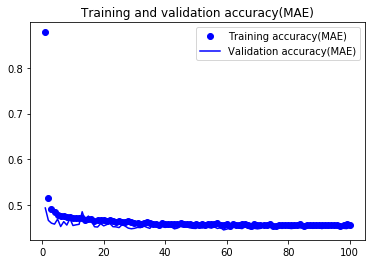

124/124 [==============================] - 0s 2ms/step - loss: 0.3057 - mean_absolute_error: 0.4387
Test MAE: 0.439
14


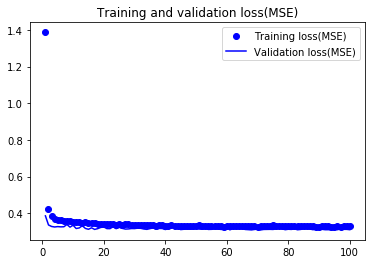

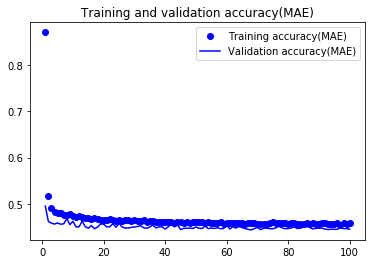

124/124 [==============================] - 0s 2ms/step - loss: 0.3043 - mean_absolute_error: 0.4369
Test MAE: 0.437
15


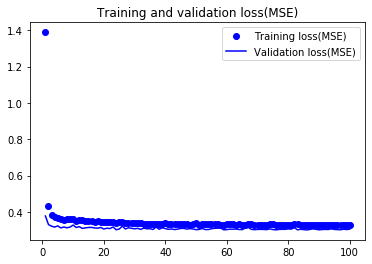

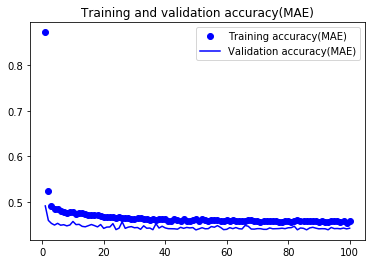

124/124 [==============================] - 0s 2ms/step - loss: 0.3156 - mean_absolute_error: 0.4459
Test MAE: 0.446
16


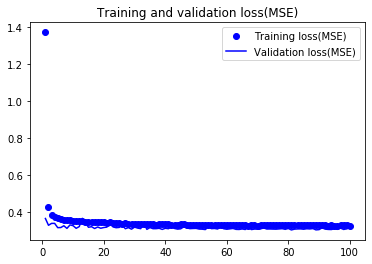

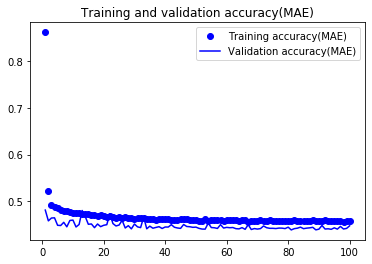

124/124 [==============================] - 0s 2ms/step - loss: 0.3027 - mean_absolute_error: 0.4399
Test MAE: 0.440
17


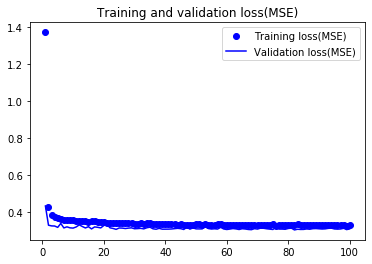

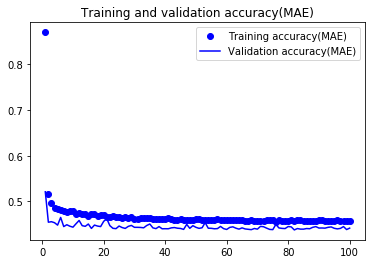

124/124 [==============================] - 0s 2ms/step - loss: 0.3021 - mean_absolute_error: 0.4379
Test MAE: 0.438
18


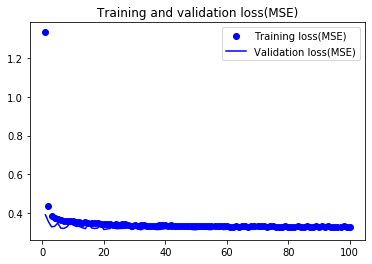

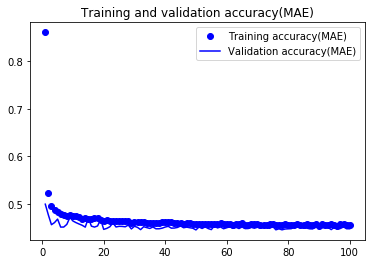

124/124 [==============================] - 0s 2ms/step - loss: 0.3028 - mean_absolute_error: 0.4355
Test MAE: 0.435
19


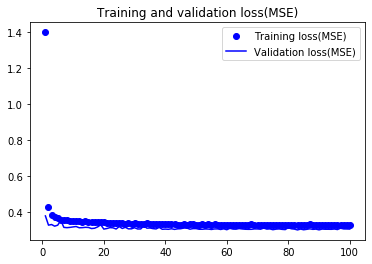

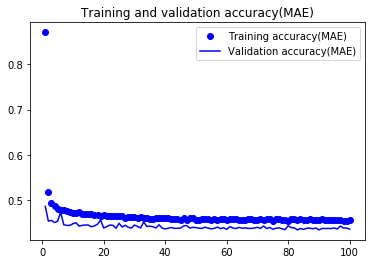

124/124 [==============================] - 0s 2ms/step - loss: 0.3157 - mean_absolute_error: 0.4456
Test MAE: 0.446
[0.4466995298862457, 0.4421355724334717, 0.442009836435318, 0.4446655511856079, 0.43743643164634705, 0.43312034010887146, 0.4473766088485718, 0.4404434561729431, 0.44614583253860474, 0.4394715130329132, 0.4427659511566162, 0.4400971531867981, 0.4387088119983673, 0.43867406249046326, 0.43688875436782837, 0.4458905756473541, 0.4399224817752838, 0.43787845969200134, 0.43545717000961304, 0.445625901222229]


In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

mae_list5 = []
for i in range(20):
    print(i)
    airports = ['VABB', 'VOTV', 'VOBL', 'VECC', 'VIDP']

    def get_visibility(code):
        arr = np.load("visibility_arr.npy")
        idx = airports.index(code)
        return arr[:, idx].astype(np.float32)

    def get_era_full(param, level):
        arr = np.load("18To20{}{}_uint8.npy".format(param, level))
        return arr.astype(np.float32)

    # Import data
    params = ["z", "z", "z"]
    levels = [500, 700, 1000]

    in1_var = get_era_full(params[0], levels[0])
    in2_var = get_era_full(params[1], levels[1])
    in3_var = get_era_full(params[2], levels[2])

    # data for a given airport
    X = np.concatenate((np.expand_dims(in1_var, axis=3), np.expand_dims(in2_var, axis=3), np.expand_dims(in3_var, axis=3)), axis=3)
    Y = get_visibility('VIDP').reshape(-1, 1)

    import sklearn
    from sklearn.model_selection import train_test_split

    # In the first step we will split the data in training and remaining dataset
    X_train, X_rem, Y_train, Y_rem = train_test_split(X,Y, train_size=0.7)

    # Now since we want the valid and test size to be equal. 
    X_valid, X_test, Y_valid, Y_test = train_test_split(X_rem,Y_rem, test_size=0.5)

    #to clear space for gpu, if occupied by any process
    import tensorflow as tf
    from tensorflow.compat.v1 import ConfigProto
    from tensorflow.compat.v1 import InteractiveSession
    config = ConfigProto()
    config.gpu_options.allow_growth=True
    sess = tf.compat.v1.Session(config=config)

    conv_base = tf.keras.applications.vgg16.VGG16(
        include_top=False,
        weights="imagenet",
        input_shape=(157, 157, 3))

    # preprocess_input

    train_features = tf.keras.applications.vgg16.preprocess_input(X_train)
    val_features = tf.keras.applications.vgg16.preprocess_input(X_valid)
    test_features = tf.keras.applications.vgg16.preprocess_input(X_test)

    train_features = conv_base.predict(X_train)
    val_features = conv_base.predict(X_valid)
    test_features = conv_base.predict(X_test)

    train_labels = Y_train
    val_labels = Y_valid
    test_labels = Y_test

    # model building
    inputs = keras.Input(shape = (4,4,512))
    x = layers.GlobalAveragePooling2D()(inputs)
    x = layers.BatchNormalization()(x)
    top_dropout_rate = 0.4
    x = layers.Dropout(top_dropout_rate)(x)
    outputs = layers.Dense(1)(x)
    model = keras.Model(inputs, outputs, name="vgg16")

    # compiling the model
    opt =tf.keras.optimizers.RMSprop(learning_rate=0.002)
    model.compile(loss = 'mse', optimizer = opt, metrics = [tf.keras.losses.MeanAbsoluteError()])
    callbacks = [keras.callbacks.ModelCheckpoint(filepath = f"vVIDP{i}_vgg16.keras",
                                                save_best_only = True, monitor = "val_loss")]

    history = model.fit(train_features, train_labels, batch_size = 128, epochs = 100, validation_data = (val_features, val_labels), verbose = 0, callbacks = callbacks)

    import matplotlib.pyplot as plt
    %matplotlib inline
    f1 = plt.figure();
    mae = history.history["mean_absolute_error"]
    loss = history.history["loss"]
    val_mae = history.history["val_mean_absolute_error"]
    val_loss = history.history["val_loss"]
    epochs = range(1, len(loss) + 1)

    plt.plot(epochs, loss, "bo", label = "Training loss(MSE)");
    plt.plot(epochs, val_loss, "b", label = "Validation loss(MSE)");
    plt.title("Training and validation loss(MSE)");
    plt.legend();

    f2 = plt.figure();
    plt.plot(epochs, mae, "bo", label = "Training accuracy(MAE)");
    plt.plot(epochs, val_mae, "b", label = "Validation accuracy(MAE)");
    plt.title("Training and validation accuracy(MAE)");
    plt.legend();
    plt.show();

    test_loss, test_mae = model.evaluate(test_features, test_labels)
    print(f"Test MAE: {test_mae:.3f}")
    mae_list5.append(test_mae)
    f1.savefig(f"vVIDP{i}_vgg16.jpg", bbox_inches='tight', dpi=600);
    f2.savefig(f"vVIDP{i}_vgg16.jpg", bbox_inches='tight', dpi=600);
    
print(mae_list5)

In [2]:
e = np.array(mae_list5)
np.mean(e), np.std(e), e

(0.4410706996917725,
 0.003944270134666907,
 array([0.44669953, 0.44213557, 0.44200984, 0.44466555, 0.43743643,
        0.43312034, 0.44737661, 0.44044346, 0.44614583, 0.43947151,
        0.44276595, 0.44009715, 0.43870881, 0.43867406, 0.43688875,
        0.44589058, 0.43992248, 0.43787846, 0.43545717, 0.4456259 ]))

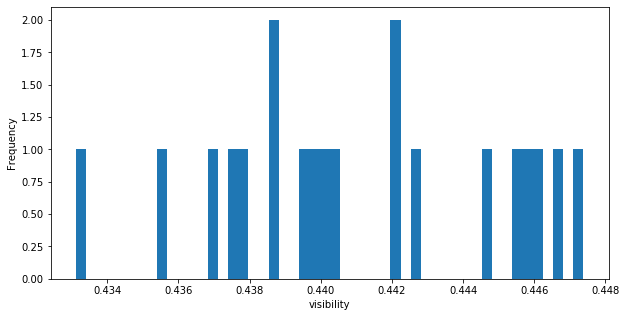

In [18]:
import pandas as pd
x = pd.Series(mae_list5)
x.plot.hist(bins=50, figsize=[10, 5])
plt.xlabel("visibility");